In [142]:
import pandas as pd
import numpy as np
import scienceplots
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

In [143]:
fitted_data = pd.read_csv('fit_details.csv',encoding="utf-8")
fitted_data

,Fuente(experimento),Texp0,Texp1,Texp2,Texp3,Texp4,Texp5,Texp6,Texp7,Texp8,...,MSE,best_error,e_ads,e_int_abs,e_des,e_int_des,e_diff,e_int_diff,lattice_size,T
0,Adsorcion de As+5 ( 60ppmSb-As),0,7.356582,12.689700,16.639759,18.501776,20.487569,23.818749,27.994834,30.050587,...,0.180722,0.102170,0.081506,0.042231,0.272000,0.068302,0.160000,0.160000,765,300.652977
1,Adsorcion de As+5 ( 60ppmAs-As),0,20.779935,25.251636,27.748749,29.965348,32.368957,36.389638,43.149442,48.682691,...,2.453615,1.915544,0.040199,0.042529,0.272000,0.068000,0.640000,0.108811,600,300.000000
2,Adsorcion de As+5 ( 90ppmAs-As),0,17.067494,22.581181,27.208246,29.441427,31.863017,35.913776,42.724149,48.187964,...,0.792748,0.661106,0.047140,0.038715,0.243444,0.267271,0.586739,0.150995,737,300.008465
3,Adsorcion de Pb (beta -FeOOH 0.05 M-Pb),0,1.145313,1.696100,2.264219,3.106472,3.699600,4.016499,4.056284,4.106165,...,0.135049,0.037399,0.115559,0.077452,0.099043,0.166115,0.160000,0.118336,783,300.000000
4,Adsorcion de Sb (beta -FeOOH 0.05 M-Sb),0,6.008902,10.187933,12.134026,13.930267,15.141939,16.922354,20.326410,23.376360,...,0.123435,0.109109,0.087042,0.051374,0.147142,0.149227,0.593463,0.085338,658,300.623917
5,Adsorcion de Sb ( 60ppmSb-Sb),0,27.241766,41.585839,46.084479,48.311079,49.992389,52.567519,55.551390,57.868871,...,3.111281,3.198456,0.034788,0.035238,0.250392,-0.027200,NaN,NaN,600,300.525227
6,Adsorcion de Sb ( 60ppmAs-Sb),0,34.587323,41.906065,44.300046,46.055632,46.967624,48.723210,51.983584,54.331965,...,1.153845,39.797460,0.001187,0.081499,0.234875,-0.015344,0.211515,-0.039092,315,300.025359
7,Adsorcion de Sb ( 60ppmHg-Sb),0,29.154068,36.910247,42.092633,43.724502,44.948404,50.227982,62.491001,64.050876,...,6.121742,5.697875,0.039200,0.032803,0.272000,0.148845,0.206789,0.160000,600,300.198780
8,Adsorcion de Sb ( 120ppmAs-Sb),0,21.817095,29.432051,34.577737,37.286592,39.562941,43.523788,51.331664,56.111996,...,1.028285,0.843838,0.039200,0.035252,0.272000,0.272000,0.640000,0.068713,727,300.644217
9,Adsorcion de Sb ( 120ppmSb-Sb),0,12.184766,16.710792,20.125645,22.100067,23.401391,26.923940,33.789545,37.715952,...,0.945446,0.596735,0.080085,0.040421,0.272000,0.111082,0.187424,0.160000,600,300.358782


In [144]:
fitted_data.columns

Index(['Fuente(experimento)', 'Texp0', 'Texp1', 'Texp2', 'Texp3', 'Texp4',
       'Texp5', 'Texp6 ', 'Texp7 ', 'Texp8', 'mean_t0', 'mean_t1', 'mean_t3',
       'mean_t6', 'mean_t9', 'mean_t12', 'mean_t20', 'mean_t40', 'mean_t60',
       'std_t0', 'std_t1', 'std_t3', 'std_t6', 'std_t9', 'std_t12', 'std_t20',
       'std_t40', 'std_t60', 'MSE', 'best_error', 'e_ads', 'e_int_abs',
       'e_des', 'e_int_des', 'e_diff', 'e_int_diff', 'lattice_size', 'T'],
      dtype='object')

In [164]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from itertools import cycle
from matplotlib.lines import Line2D
from matplotlib.colors import to_rgba

# Estilo gráfico
plt.style.use(['science', 'ieee'])
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Computer Modern Roman']
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'svg.fonttype': 'none'
})

# Limpiar nombres de columnas
fitted_data.columns = fitted_data.columns.str.strip()

# Definir columnas
time_points = np.array([0, 1, 3, 6, 9, 12, 20, 40, 60])
exp_cols = [f"Texp{i}" for i in range(9)]
fit_mean_cols = [f"mean_t{i}" for i in time_points]

# Carpeta de salida
output_dir = "figuras_kmc"
os.makedirs(output_dir, exist_ok=True)

# Paleta de colores más sofisticada
custom_palette = (
    list(plt.get_cmap("Dark2").colors) +
    list(plt.get_cmap("Set2").colors) +
    list(plt.get_cmap("Paired").colors)
)
color_cycle = cycle(custom_palette)

# Función principal
def plot_kmc_curves(experiments):
    fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

    experiment_handles = []

    for i in experiments:
        row = fitted_data.iloc[i]
        fuente_raw = row["Fuente(experimento)"]
        fuente = fuente_raw.replace("beta", r"$\beta$")

        y_exp = row[exp_cols].values.astype(float)
        y_fit_mean = row[fit_mean_cols].values.astype(float)

        color = next(color_cycle)
        faded_color = to_rgba(color, alpha=0.35)

        # Gráfica
        ax.scatter(time_points, y_exp, marker='s', s=30, color=faded_color)
        ax.plot(time_points, y_fit_mean, marker='o', lw=1.2, markersize=4, linestyle='--', color=color)

        # Handle para leyenda del experimento
        handle = Line2D([0], [0], color=color, marker='o', linestyle='--', label=fuente)
        experiment_handles.append(handle)

    # Leyenda simbólica (separada)
    symbol_handles = [
        Line2D([0], [0], color='gray', marker='s', linestyle='None', label='Datos experimentales'),
        Line2D([0], [0], color='gray', marker='o', linestyle='--', label='Ajuste kMC')
    ]

    # Mostrar leyendas separadas
    legend1 = ax.legend(handles=symbol_handles, loc='upper left', frameon=False, fontsize=8, title="Símbolos", title_fontsize=9)
    legend2 = ax.legend(handles=experiment_handles, loc='lower right', frameon=False, fontsize=8, title="Experimentos", title_fontsize=9)
    ax.add_artist(legend1)  # Agrega la primera leyenda manualmente para que no se sobrescriba

    # Ejes y título
    ax.set_xlabel("Tiempo (min)")
    ax.set_ylabel("$Q_t$ (%)")
    ax.grid(True)
    plt.tight_layout()

    # Guardar figura
    fig.savefig(os.path.join(output_dir, f"Ajuste_{experiments}.pdf"), bbox_inches='tight')
    plt.close(fig)

    print(f"Figura guardada en: {os.path.join(output_dir, f'Ajuste_{experiments}.pdf')}")


In [162]:

experiments = [0, 4, 8]
plot_kmc_curves(experiments)

Figura guardada en: figuras_kmc/Ajuste_[0, 4, 8].pdf


In [163]:
experiments = [2,6,10,11]
plot_kmc_curves(experiments)

Figura guardada en: figuras_kmc/Ajuste_[2, 6, 10, 11].pdf


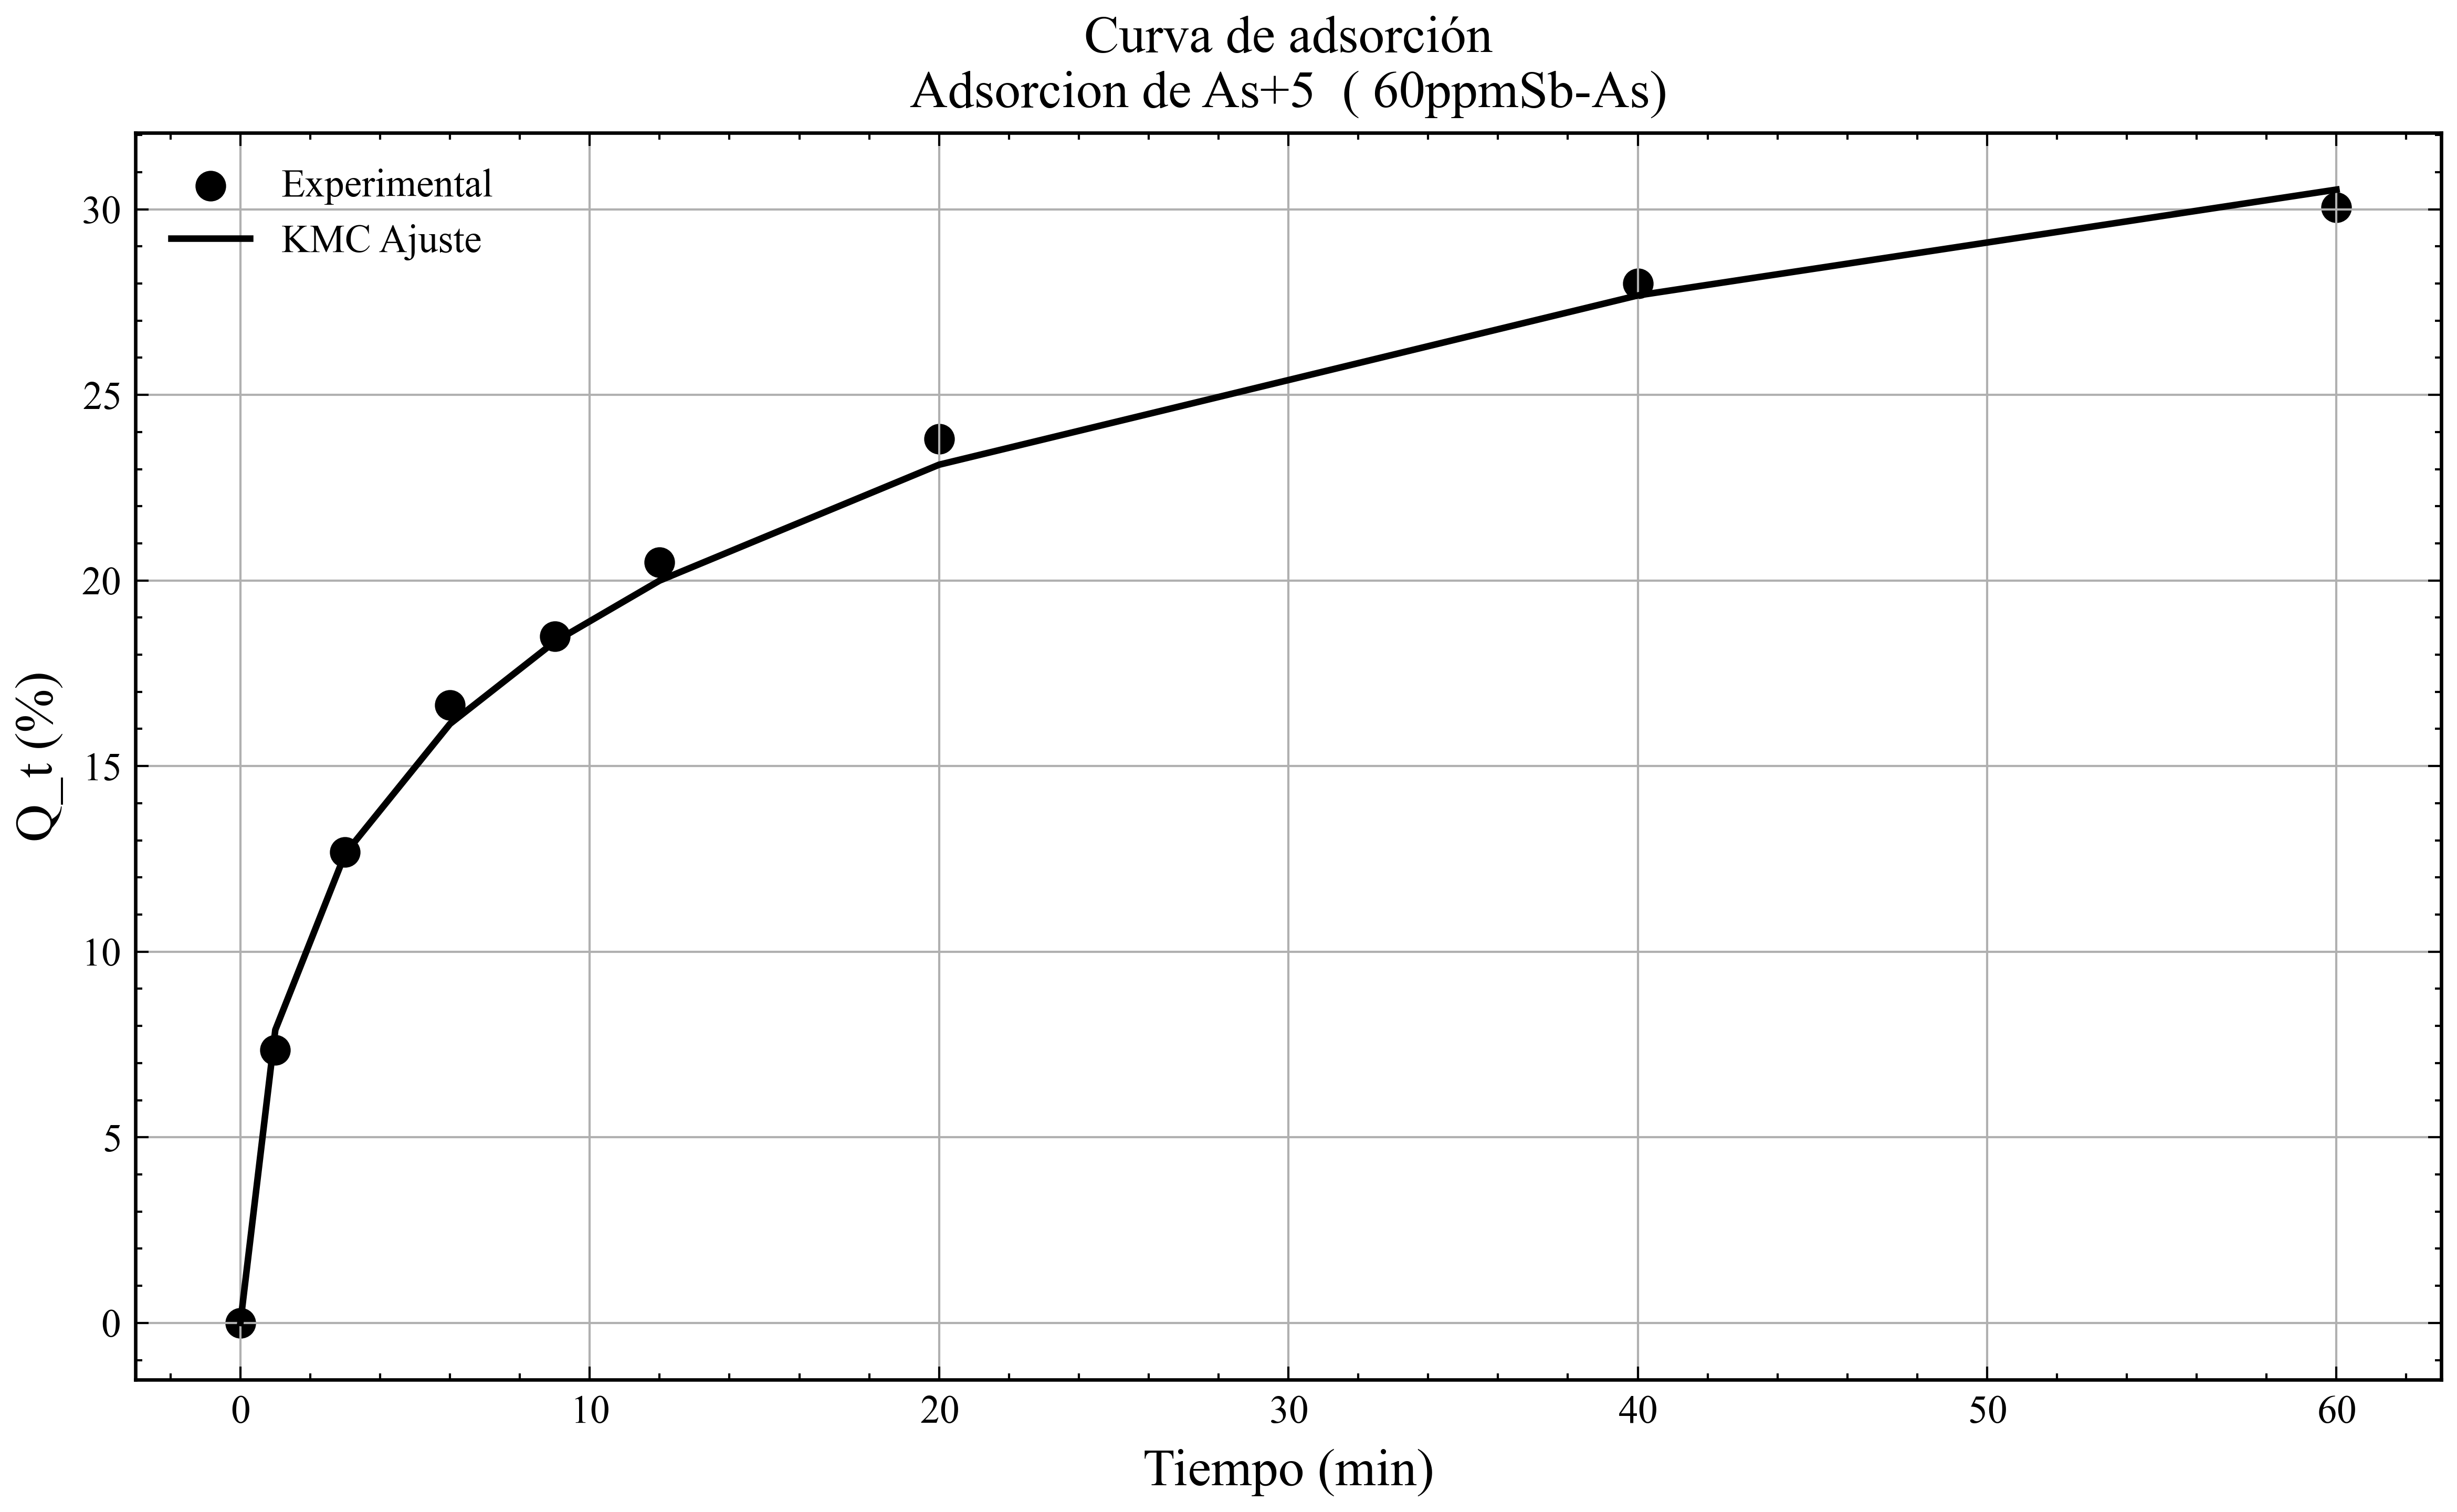

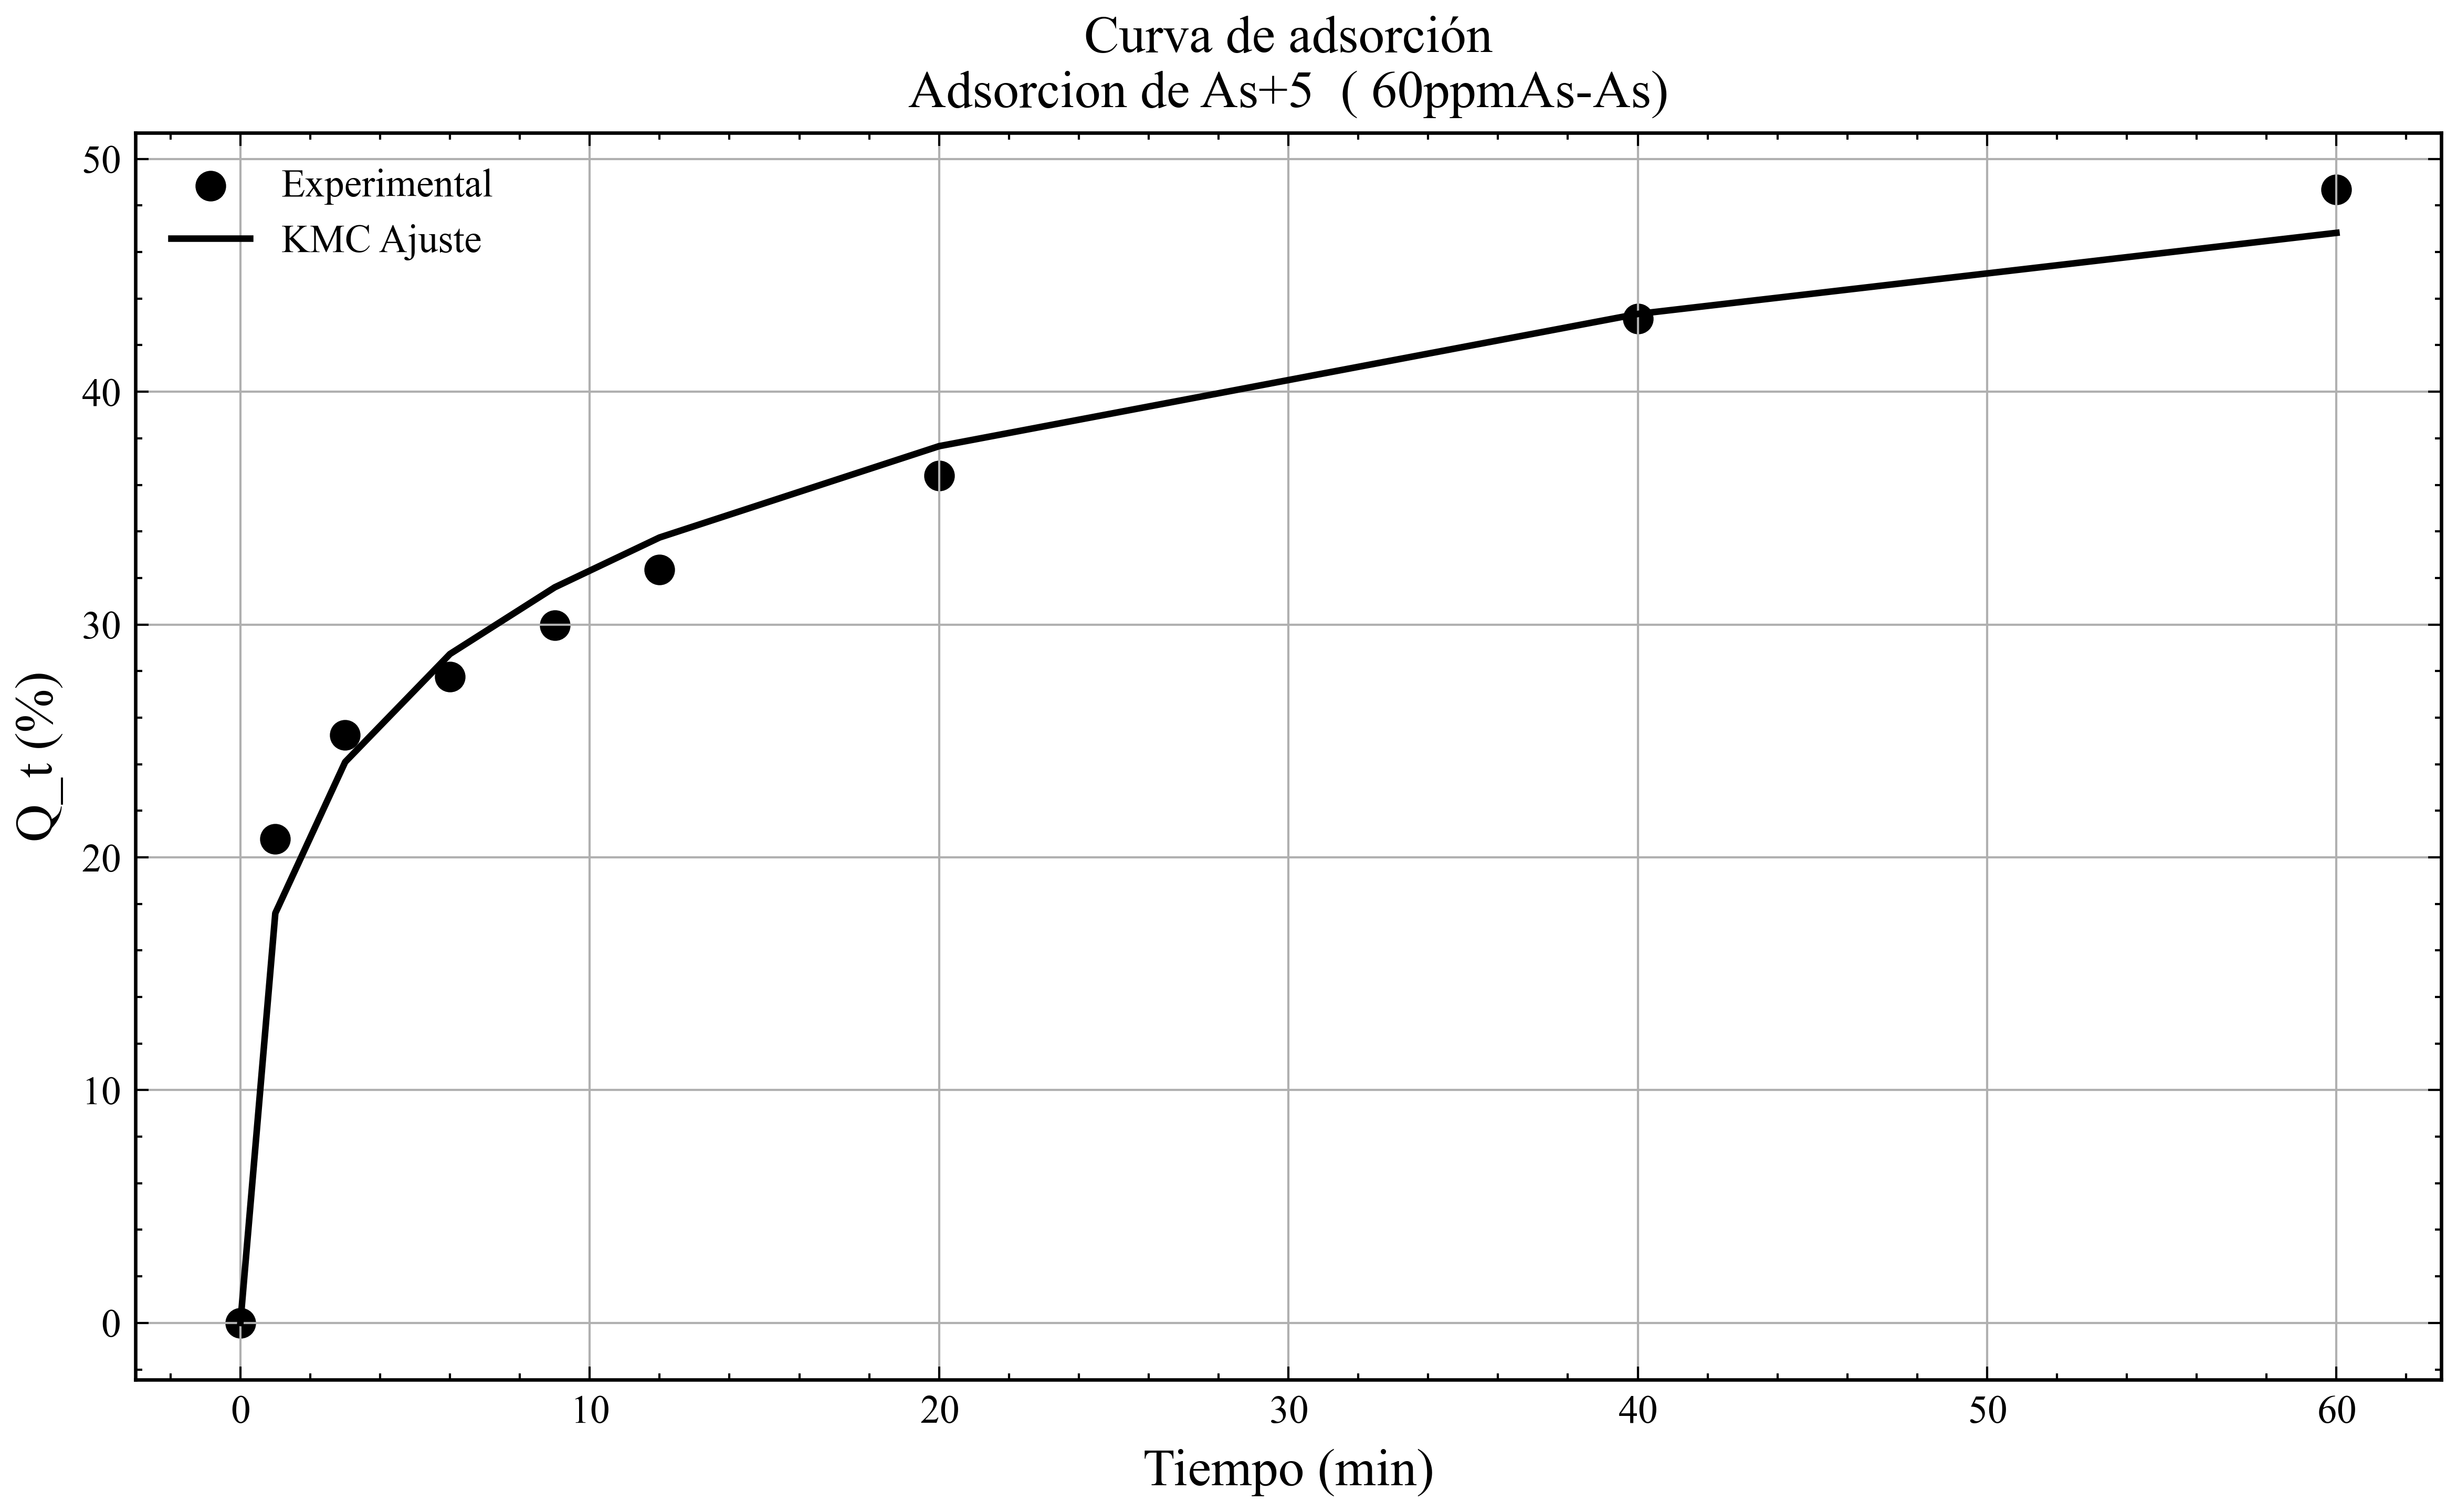

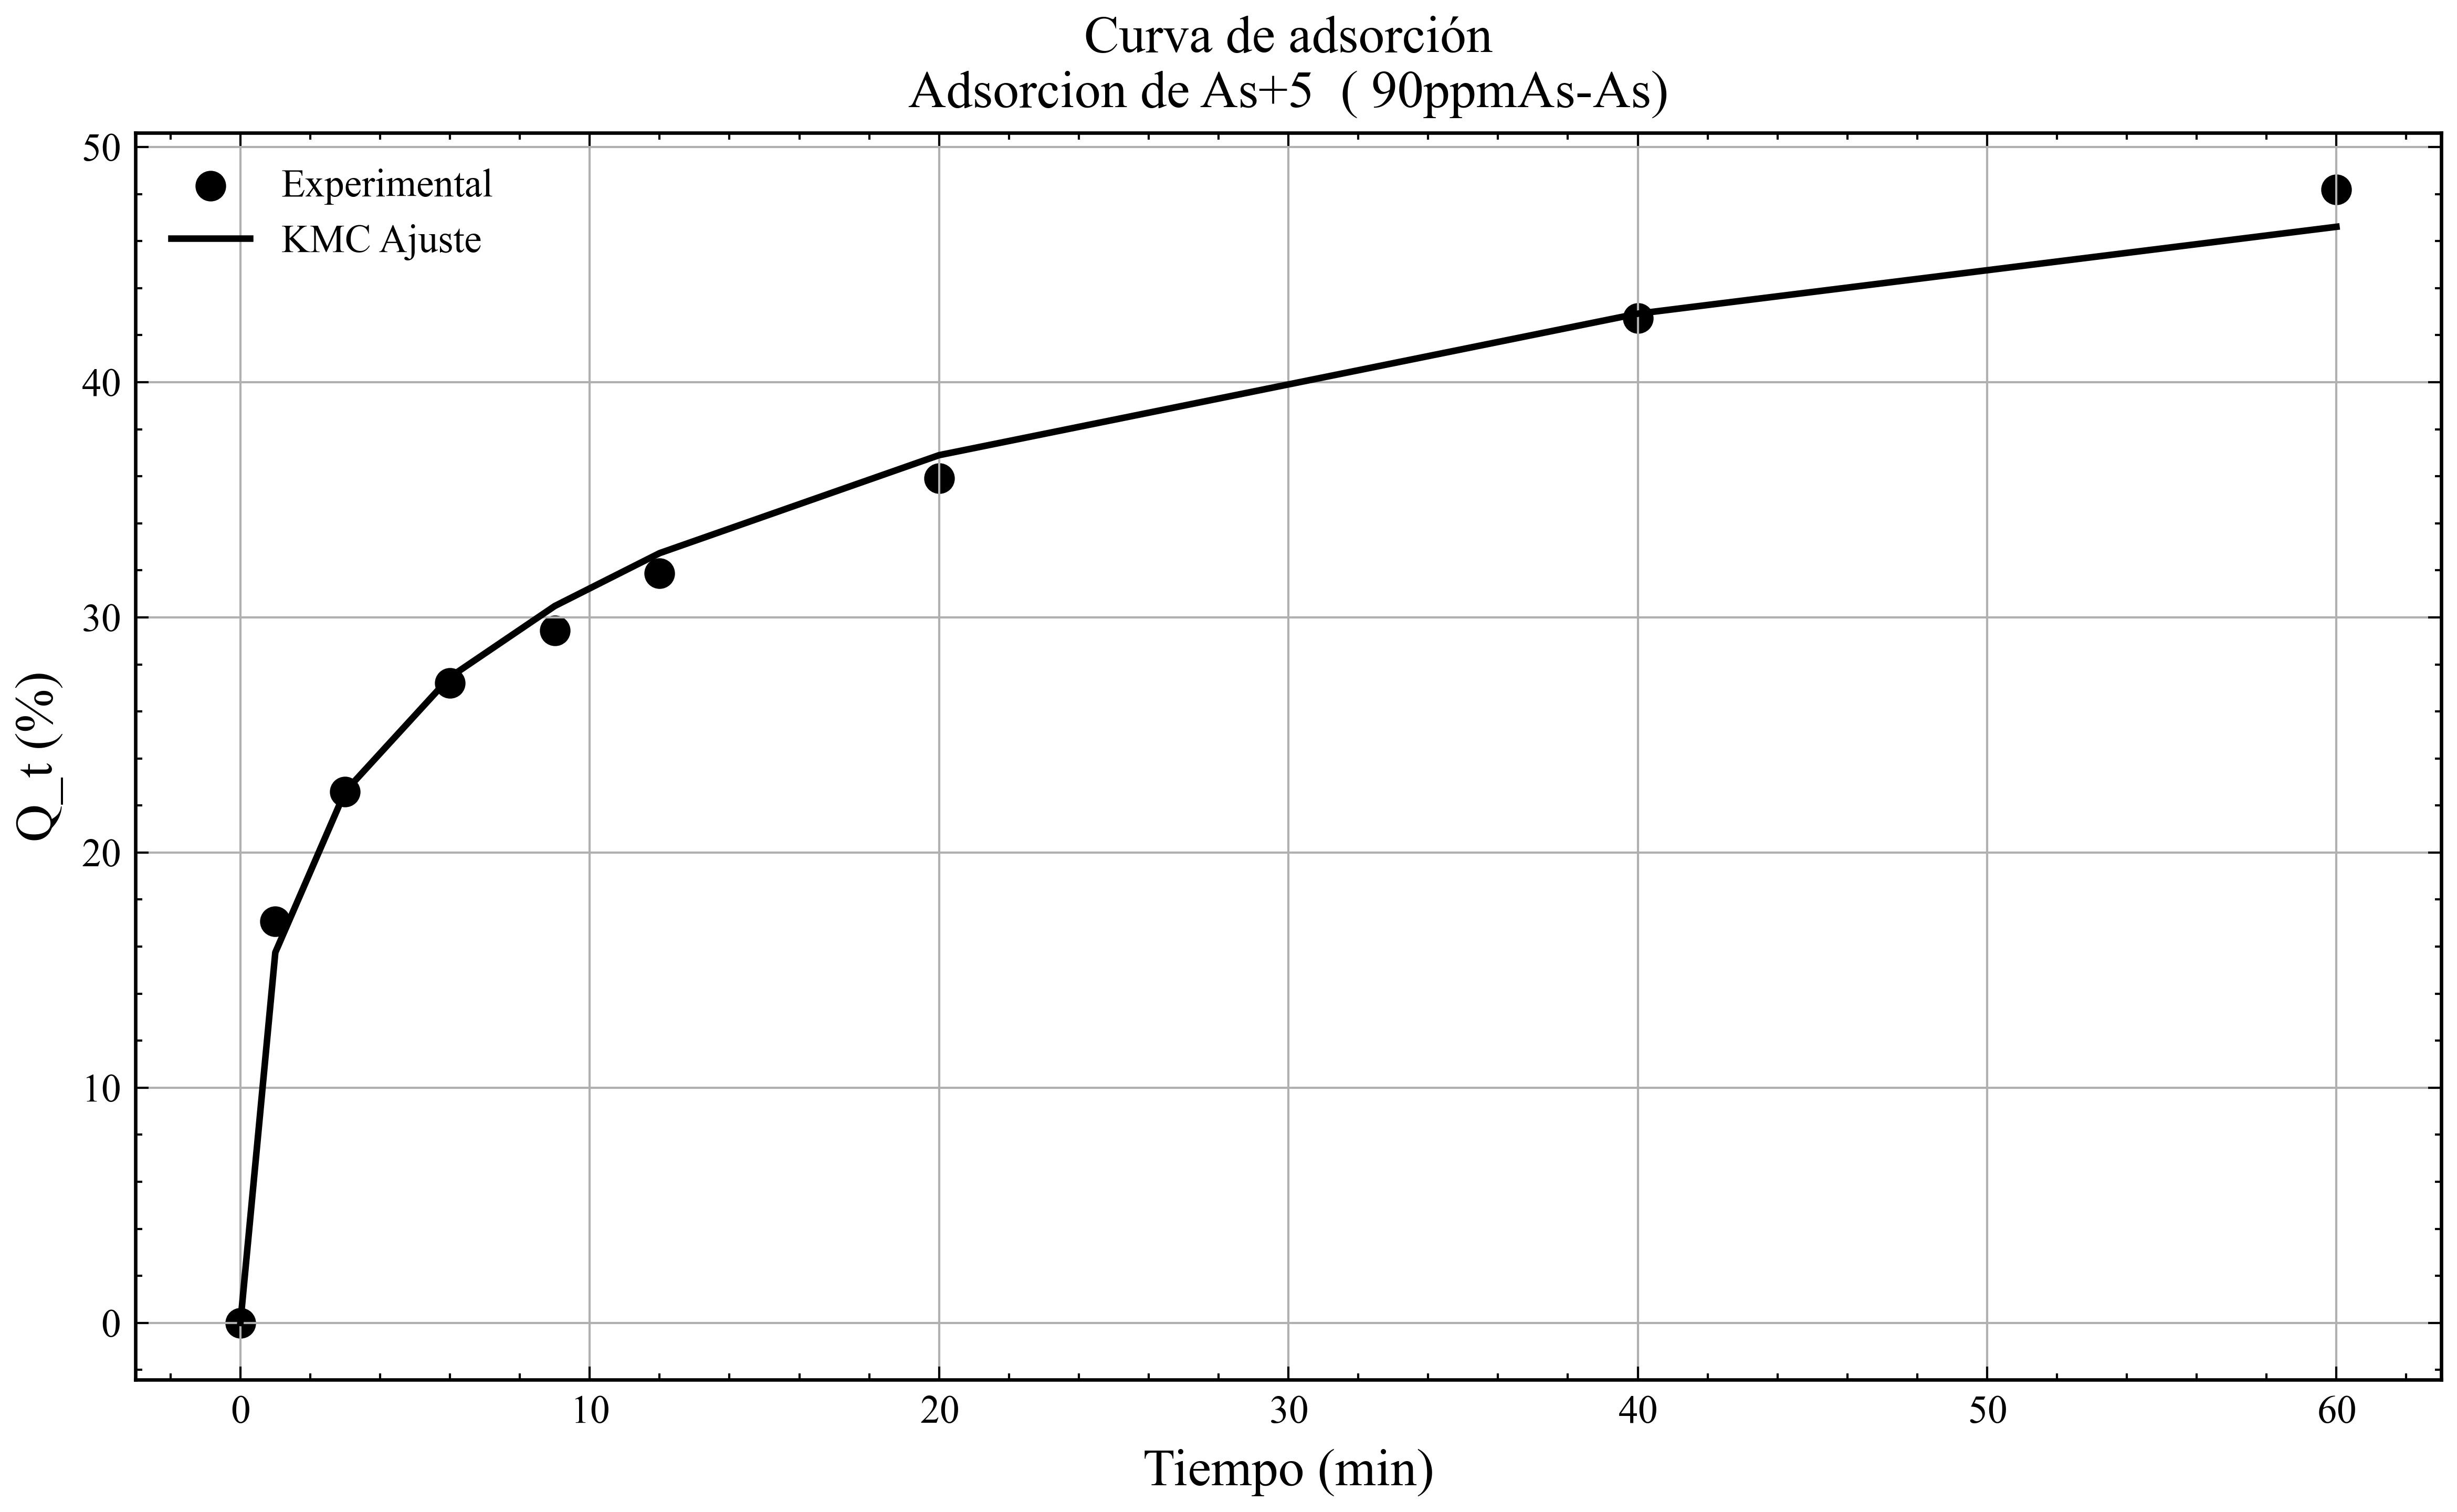

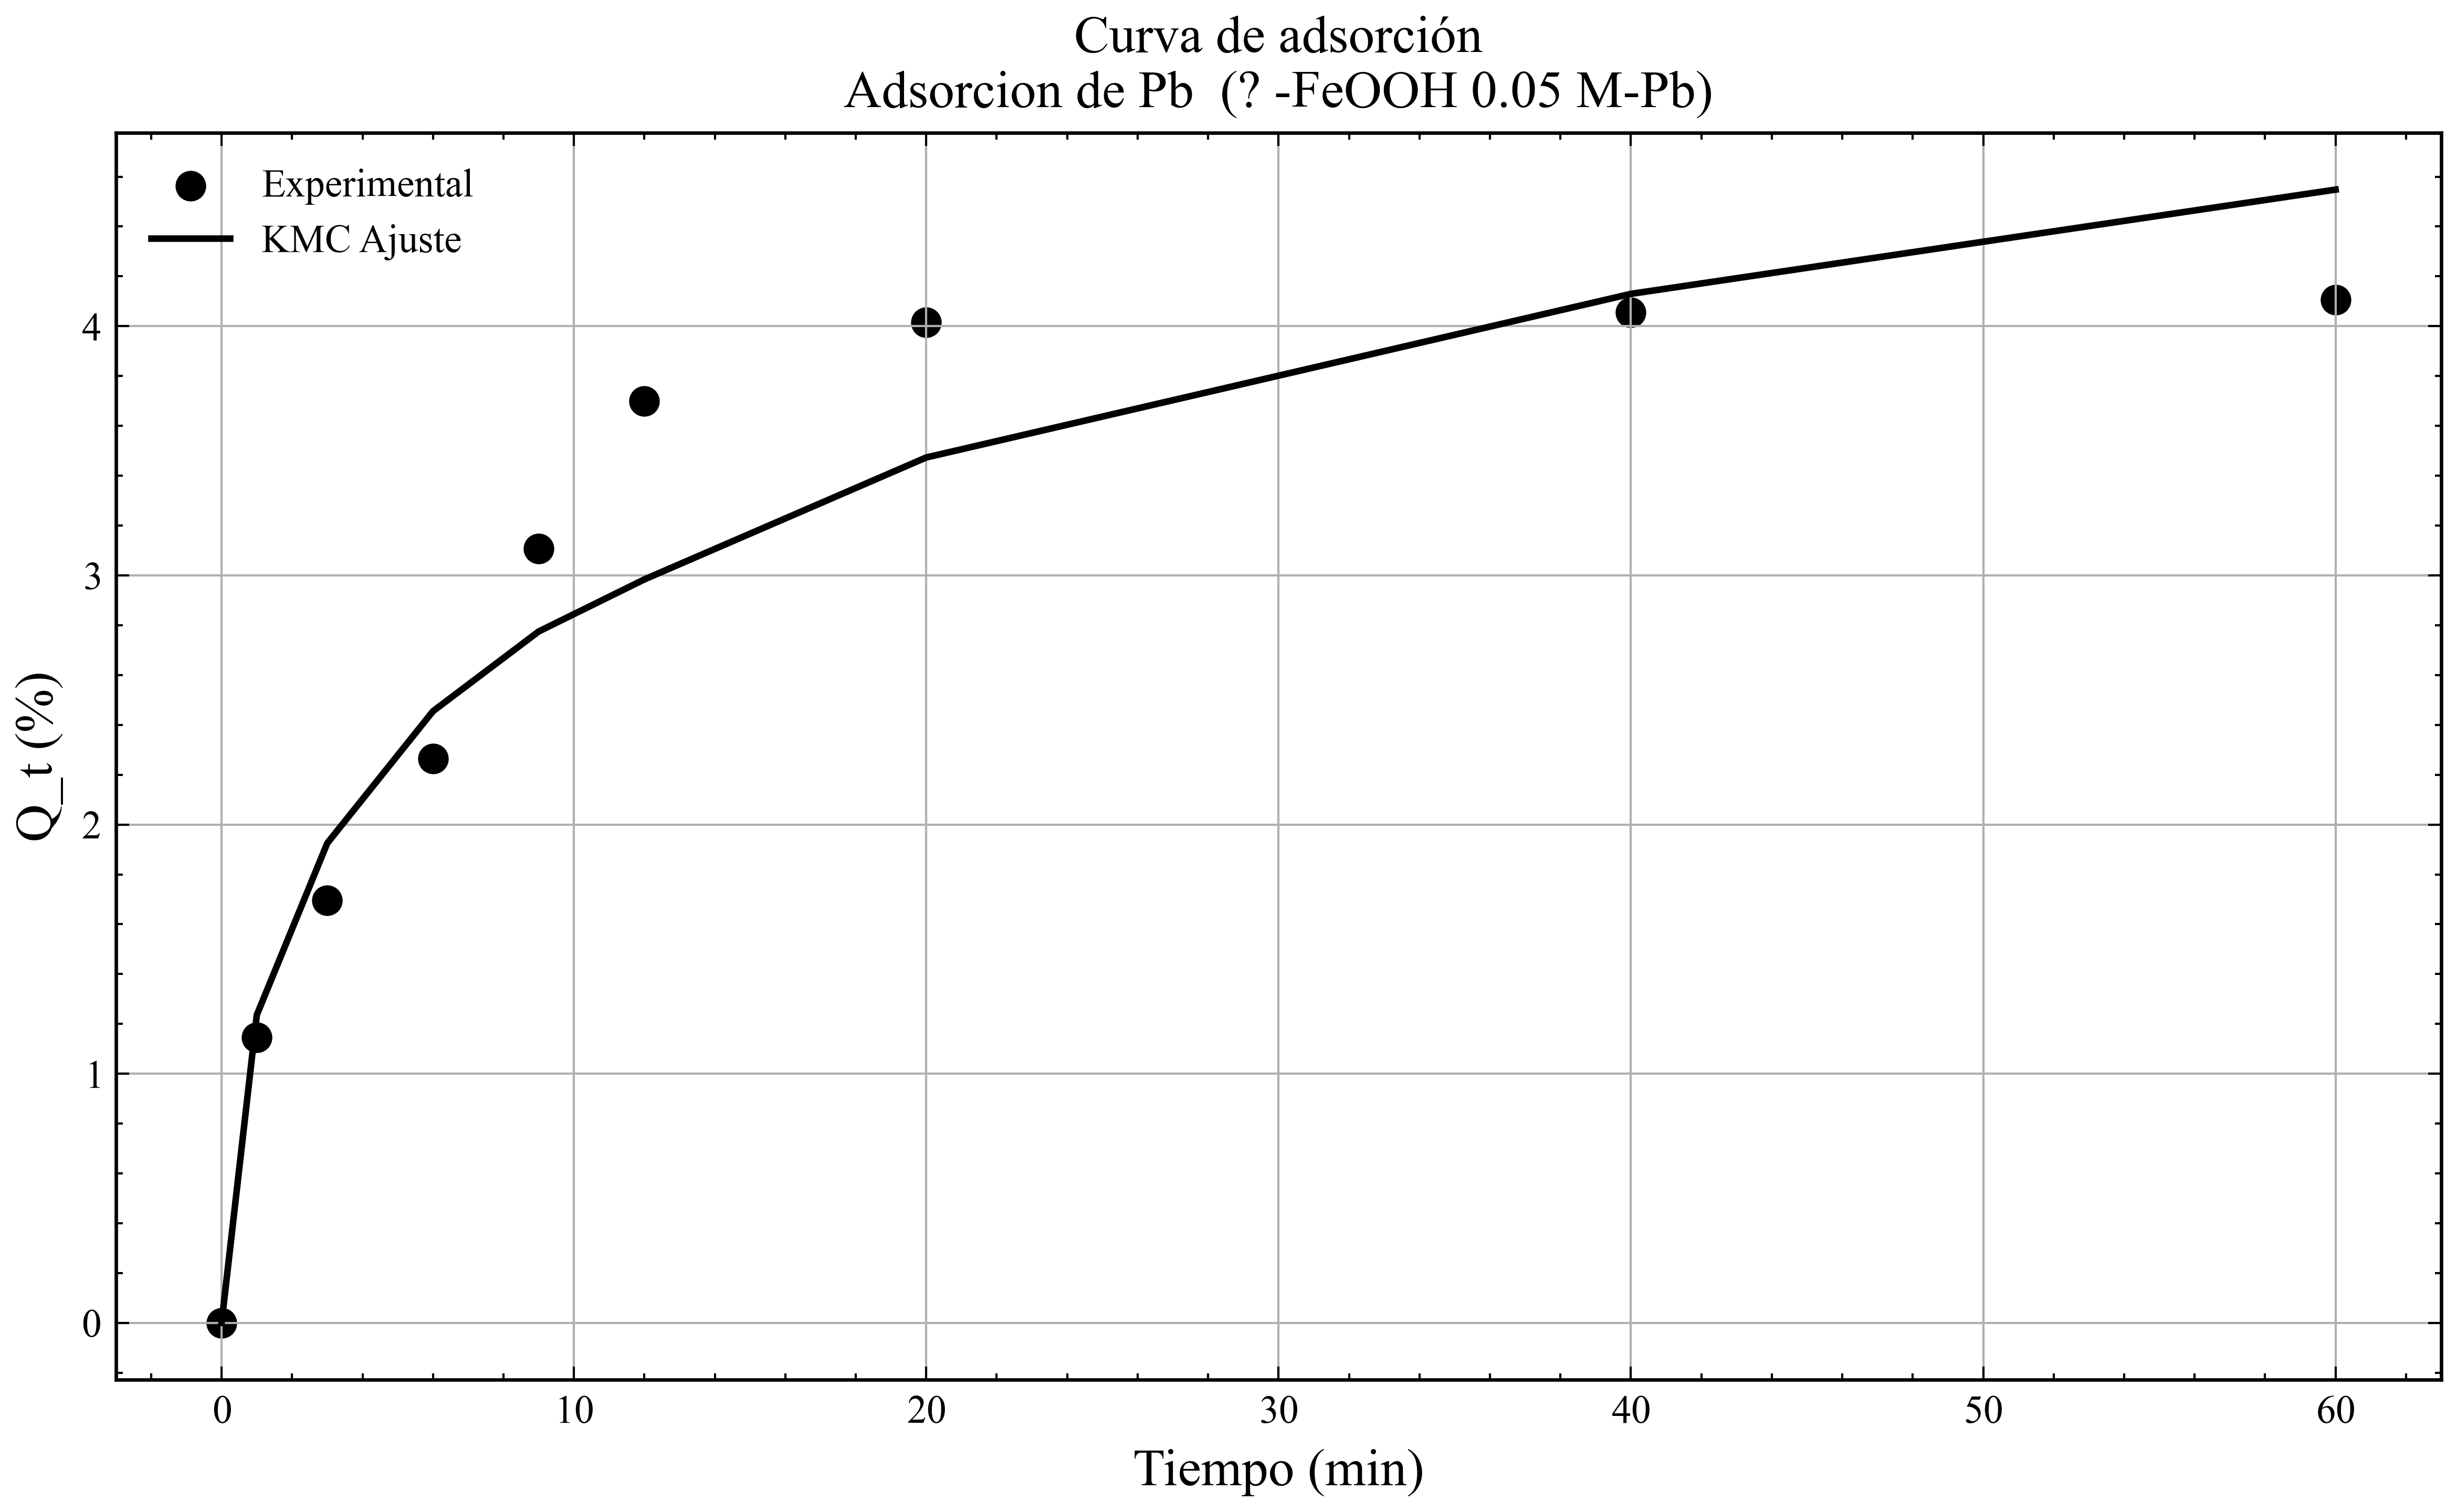

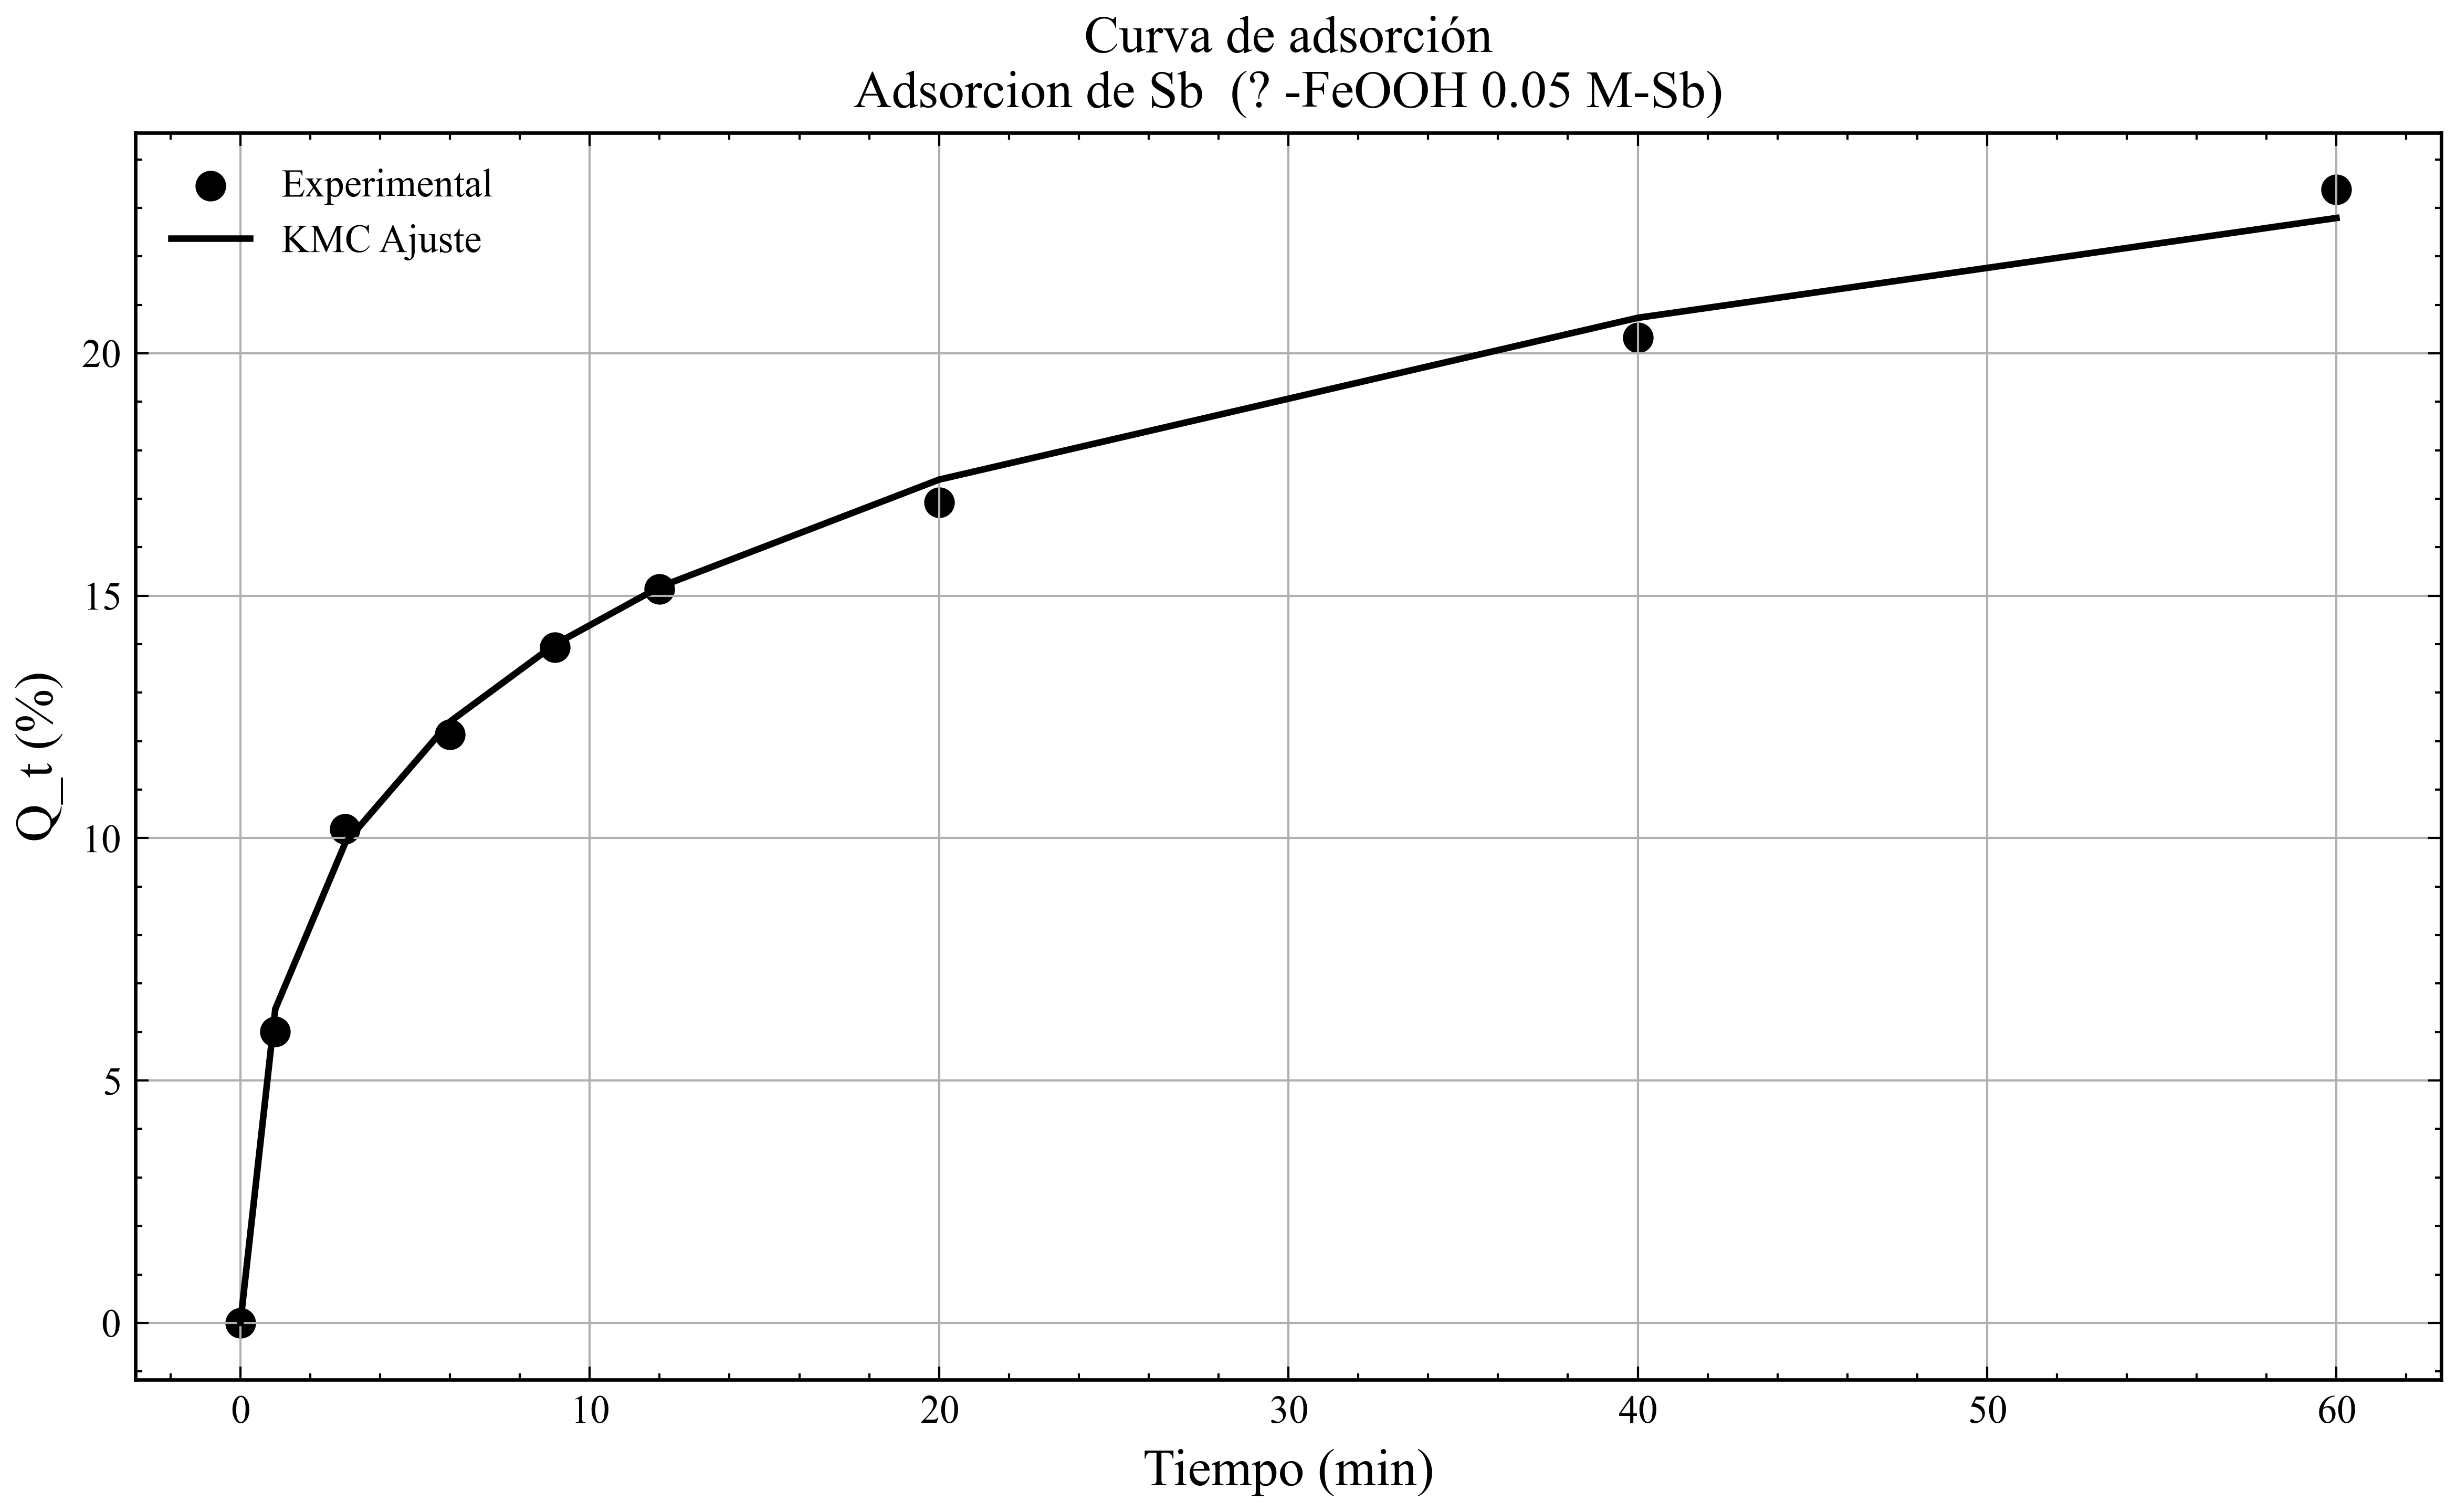

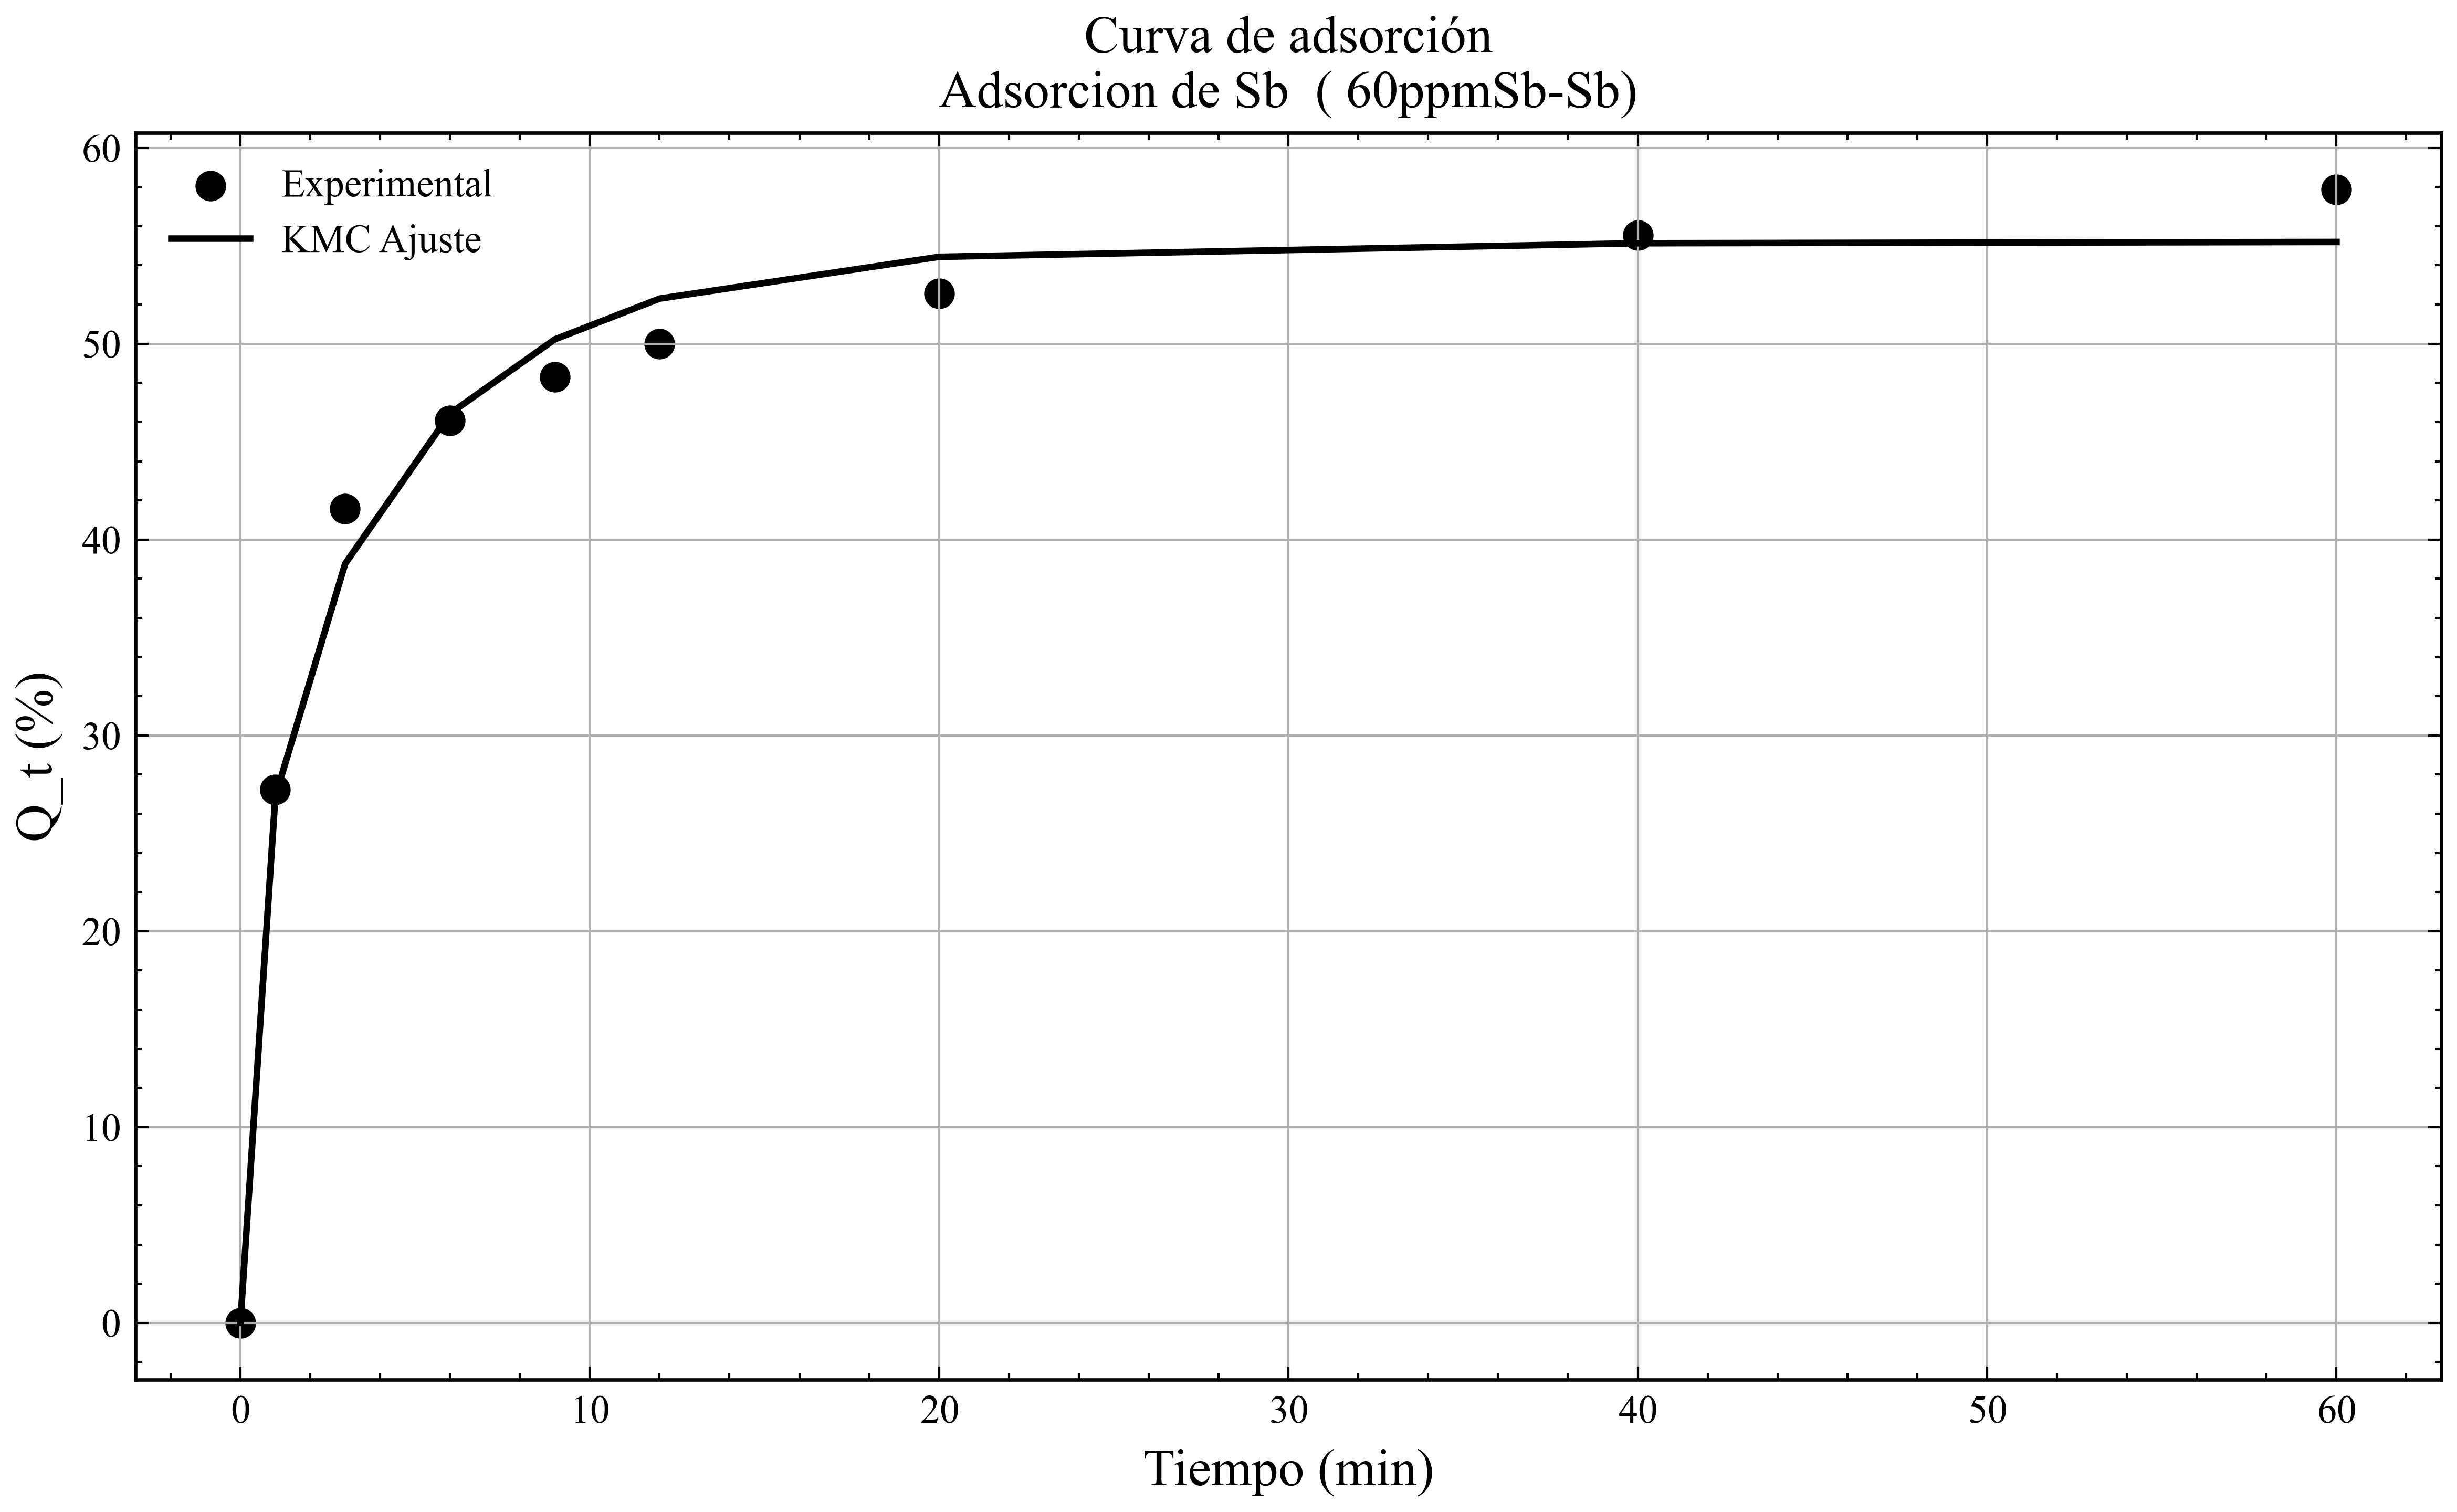

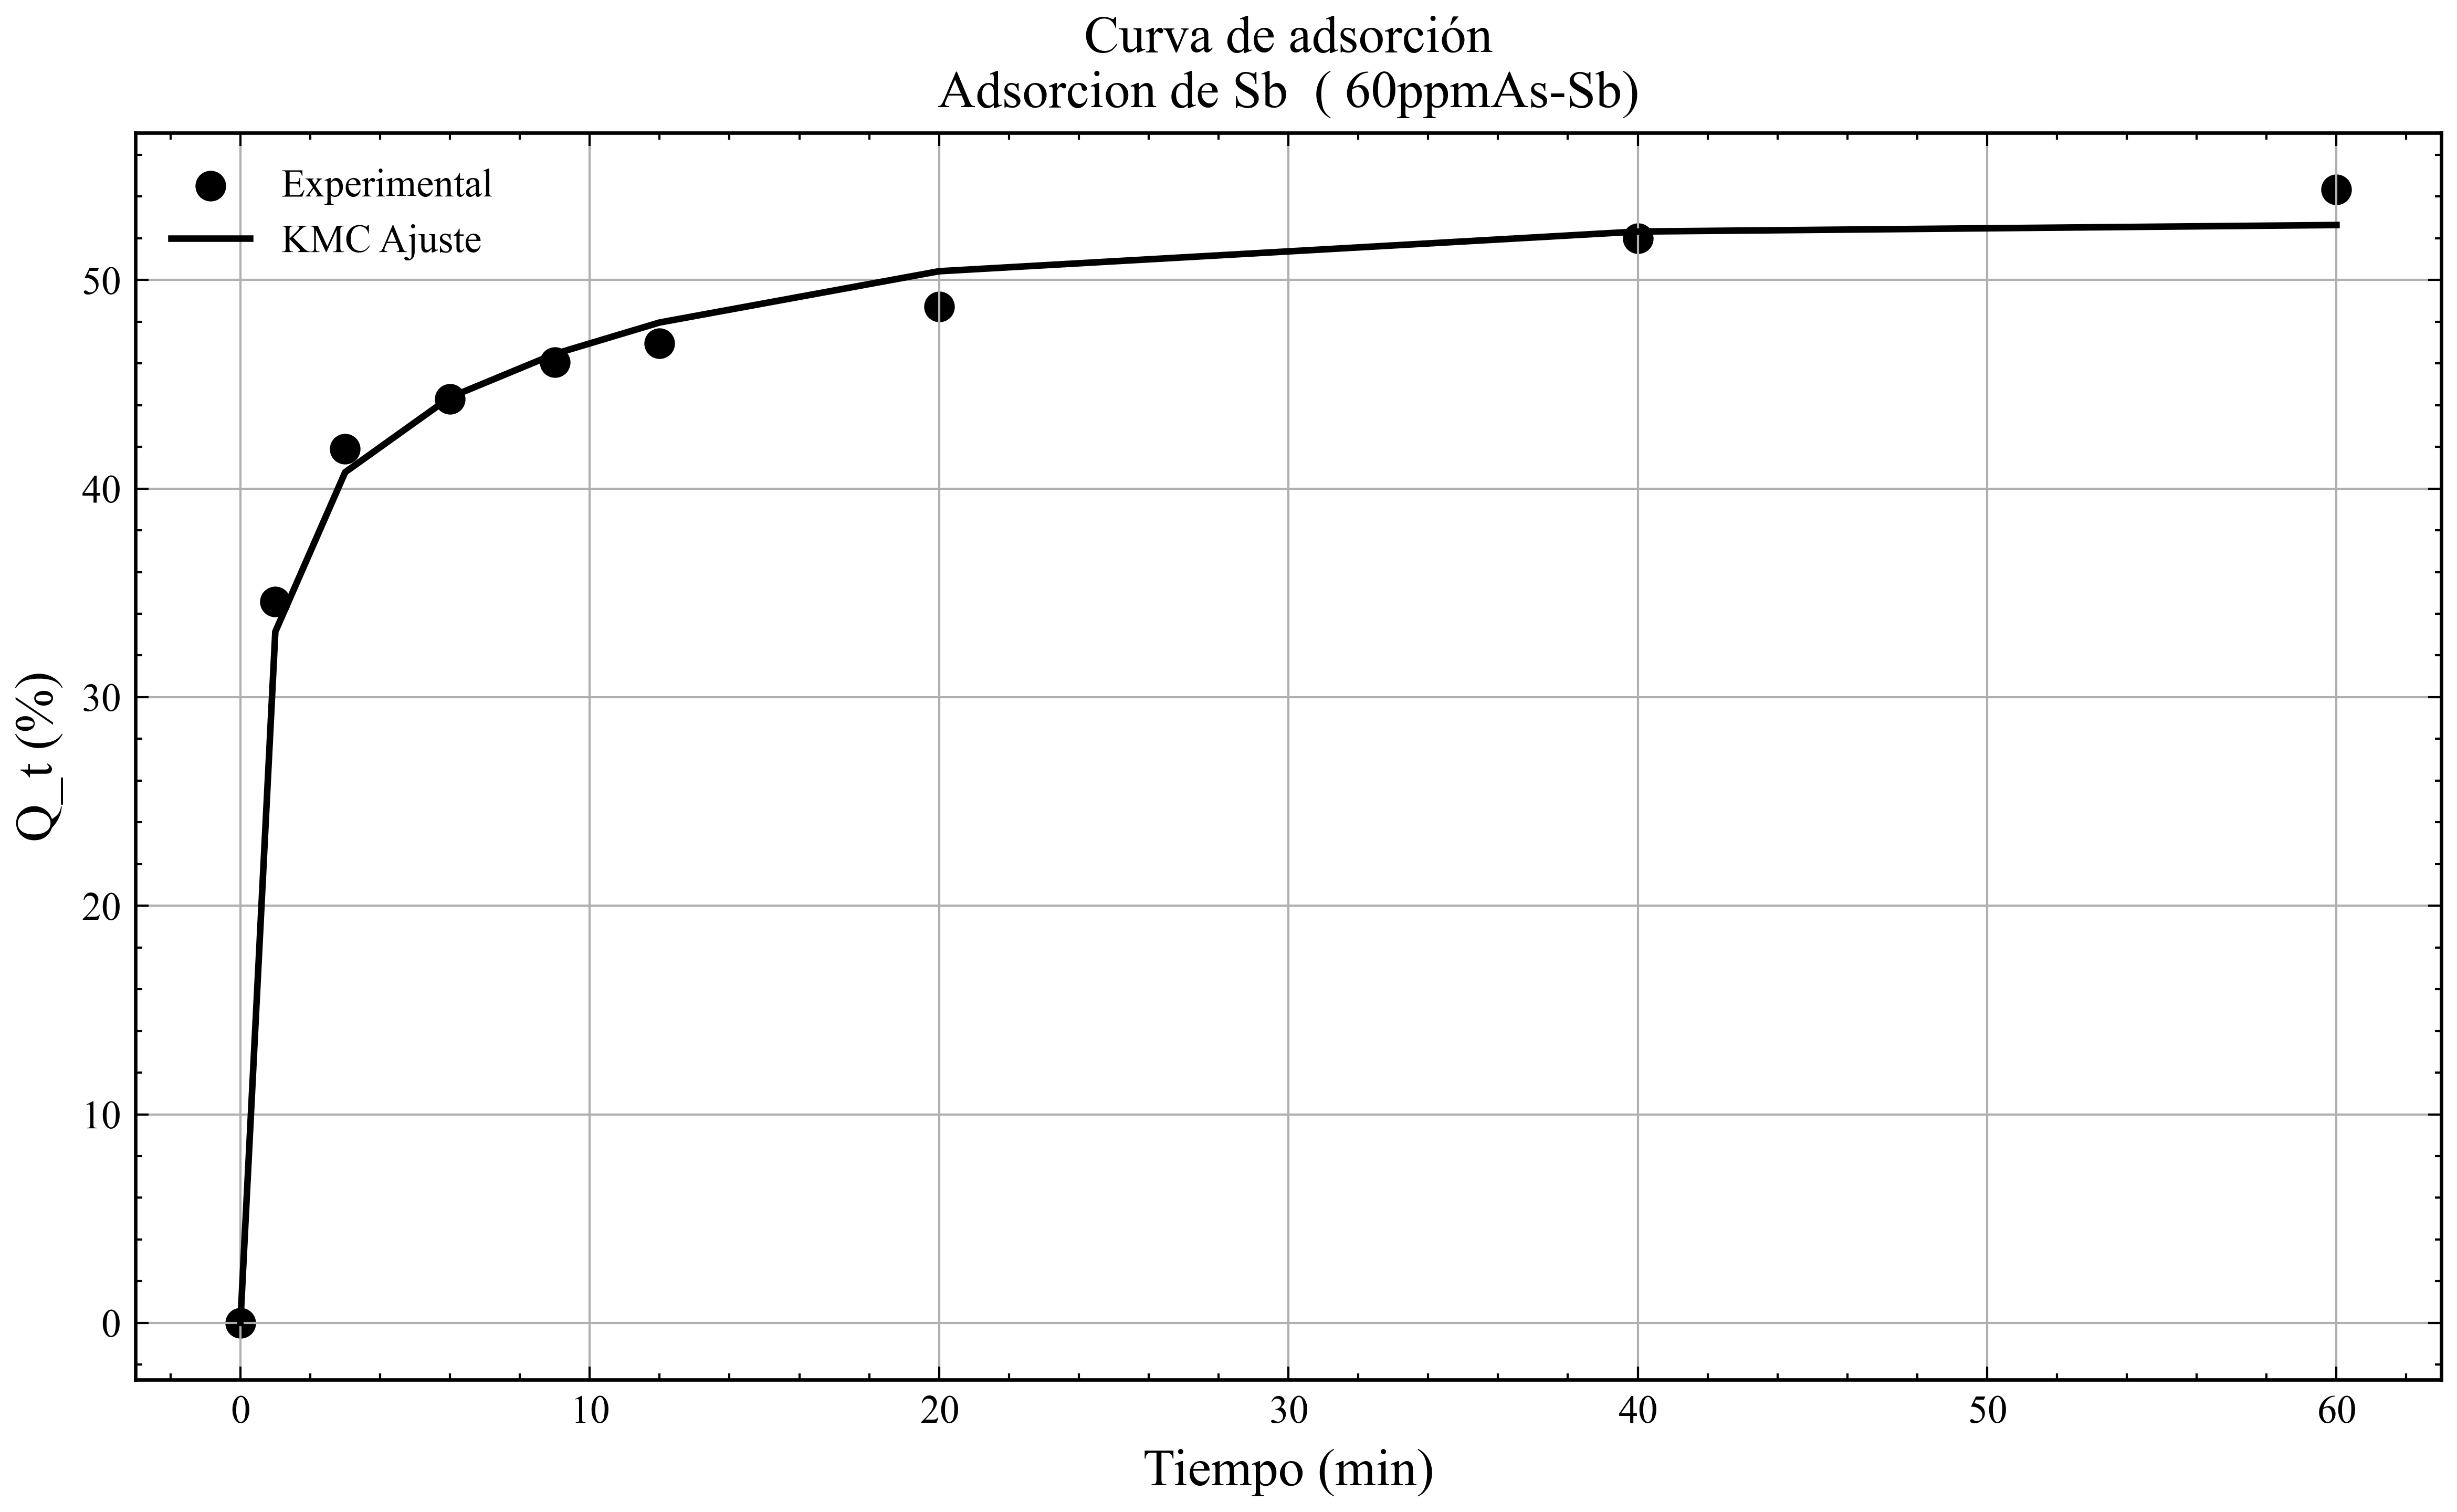

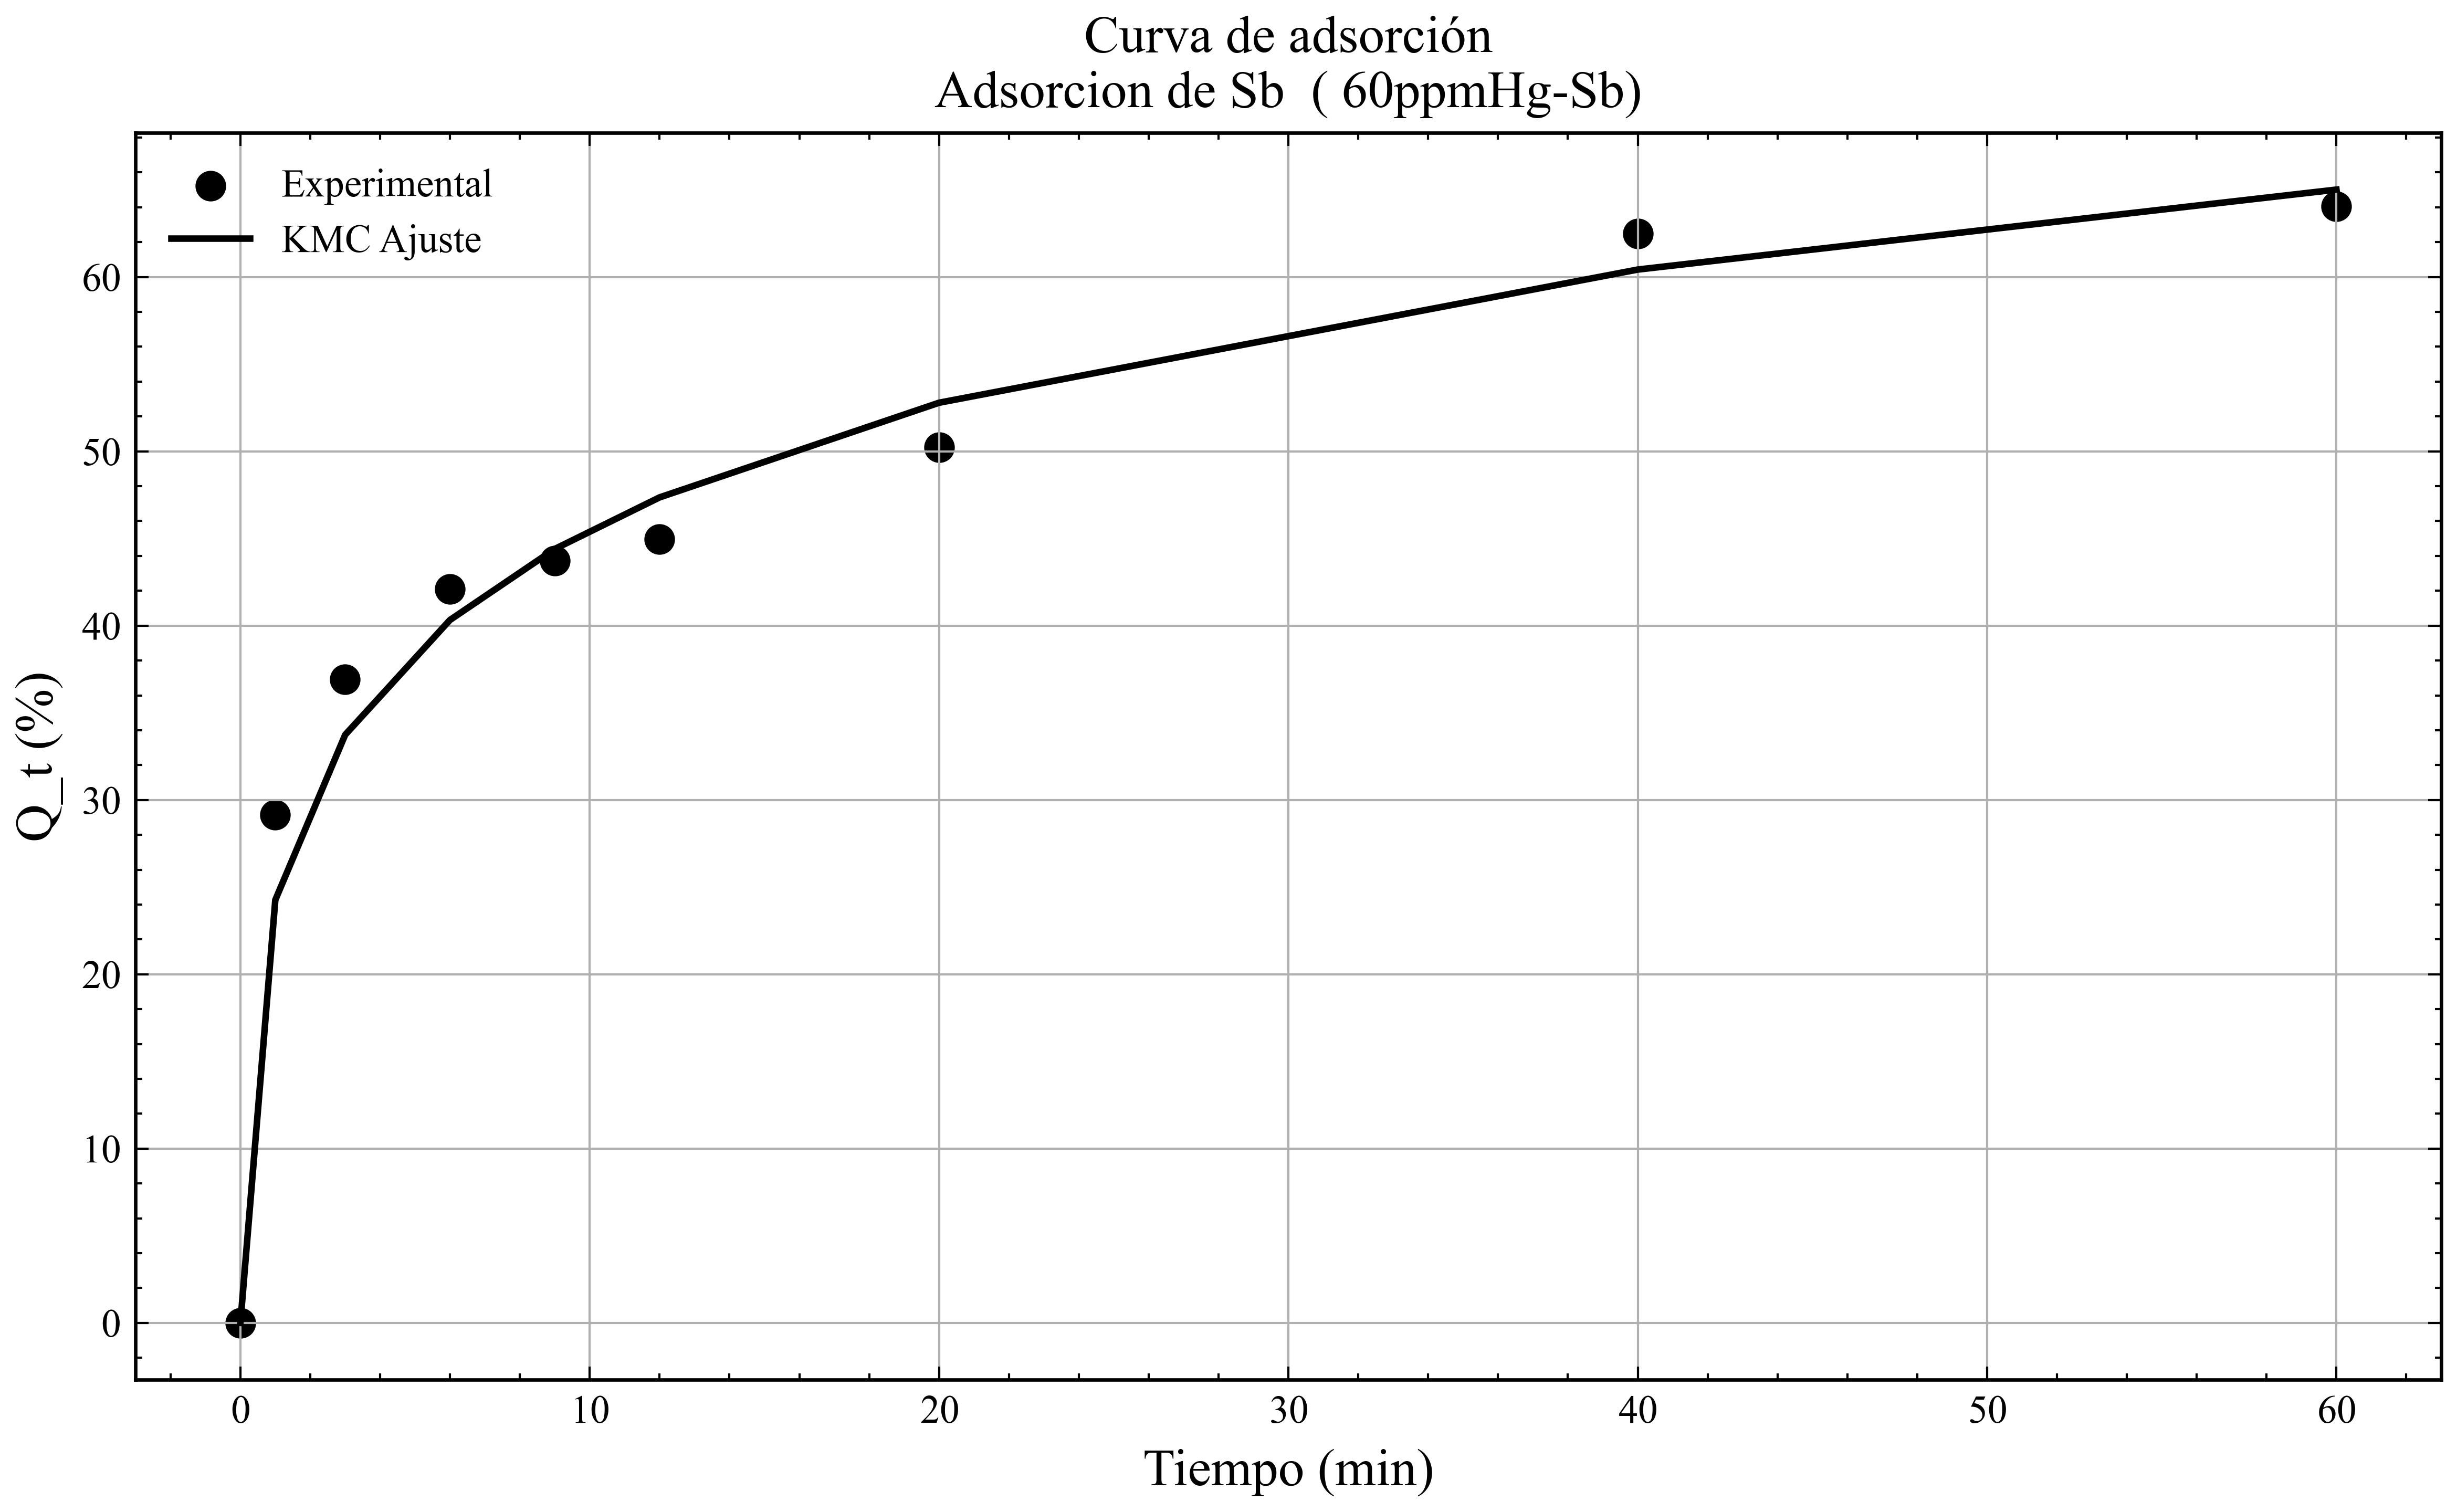

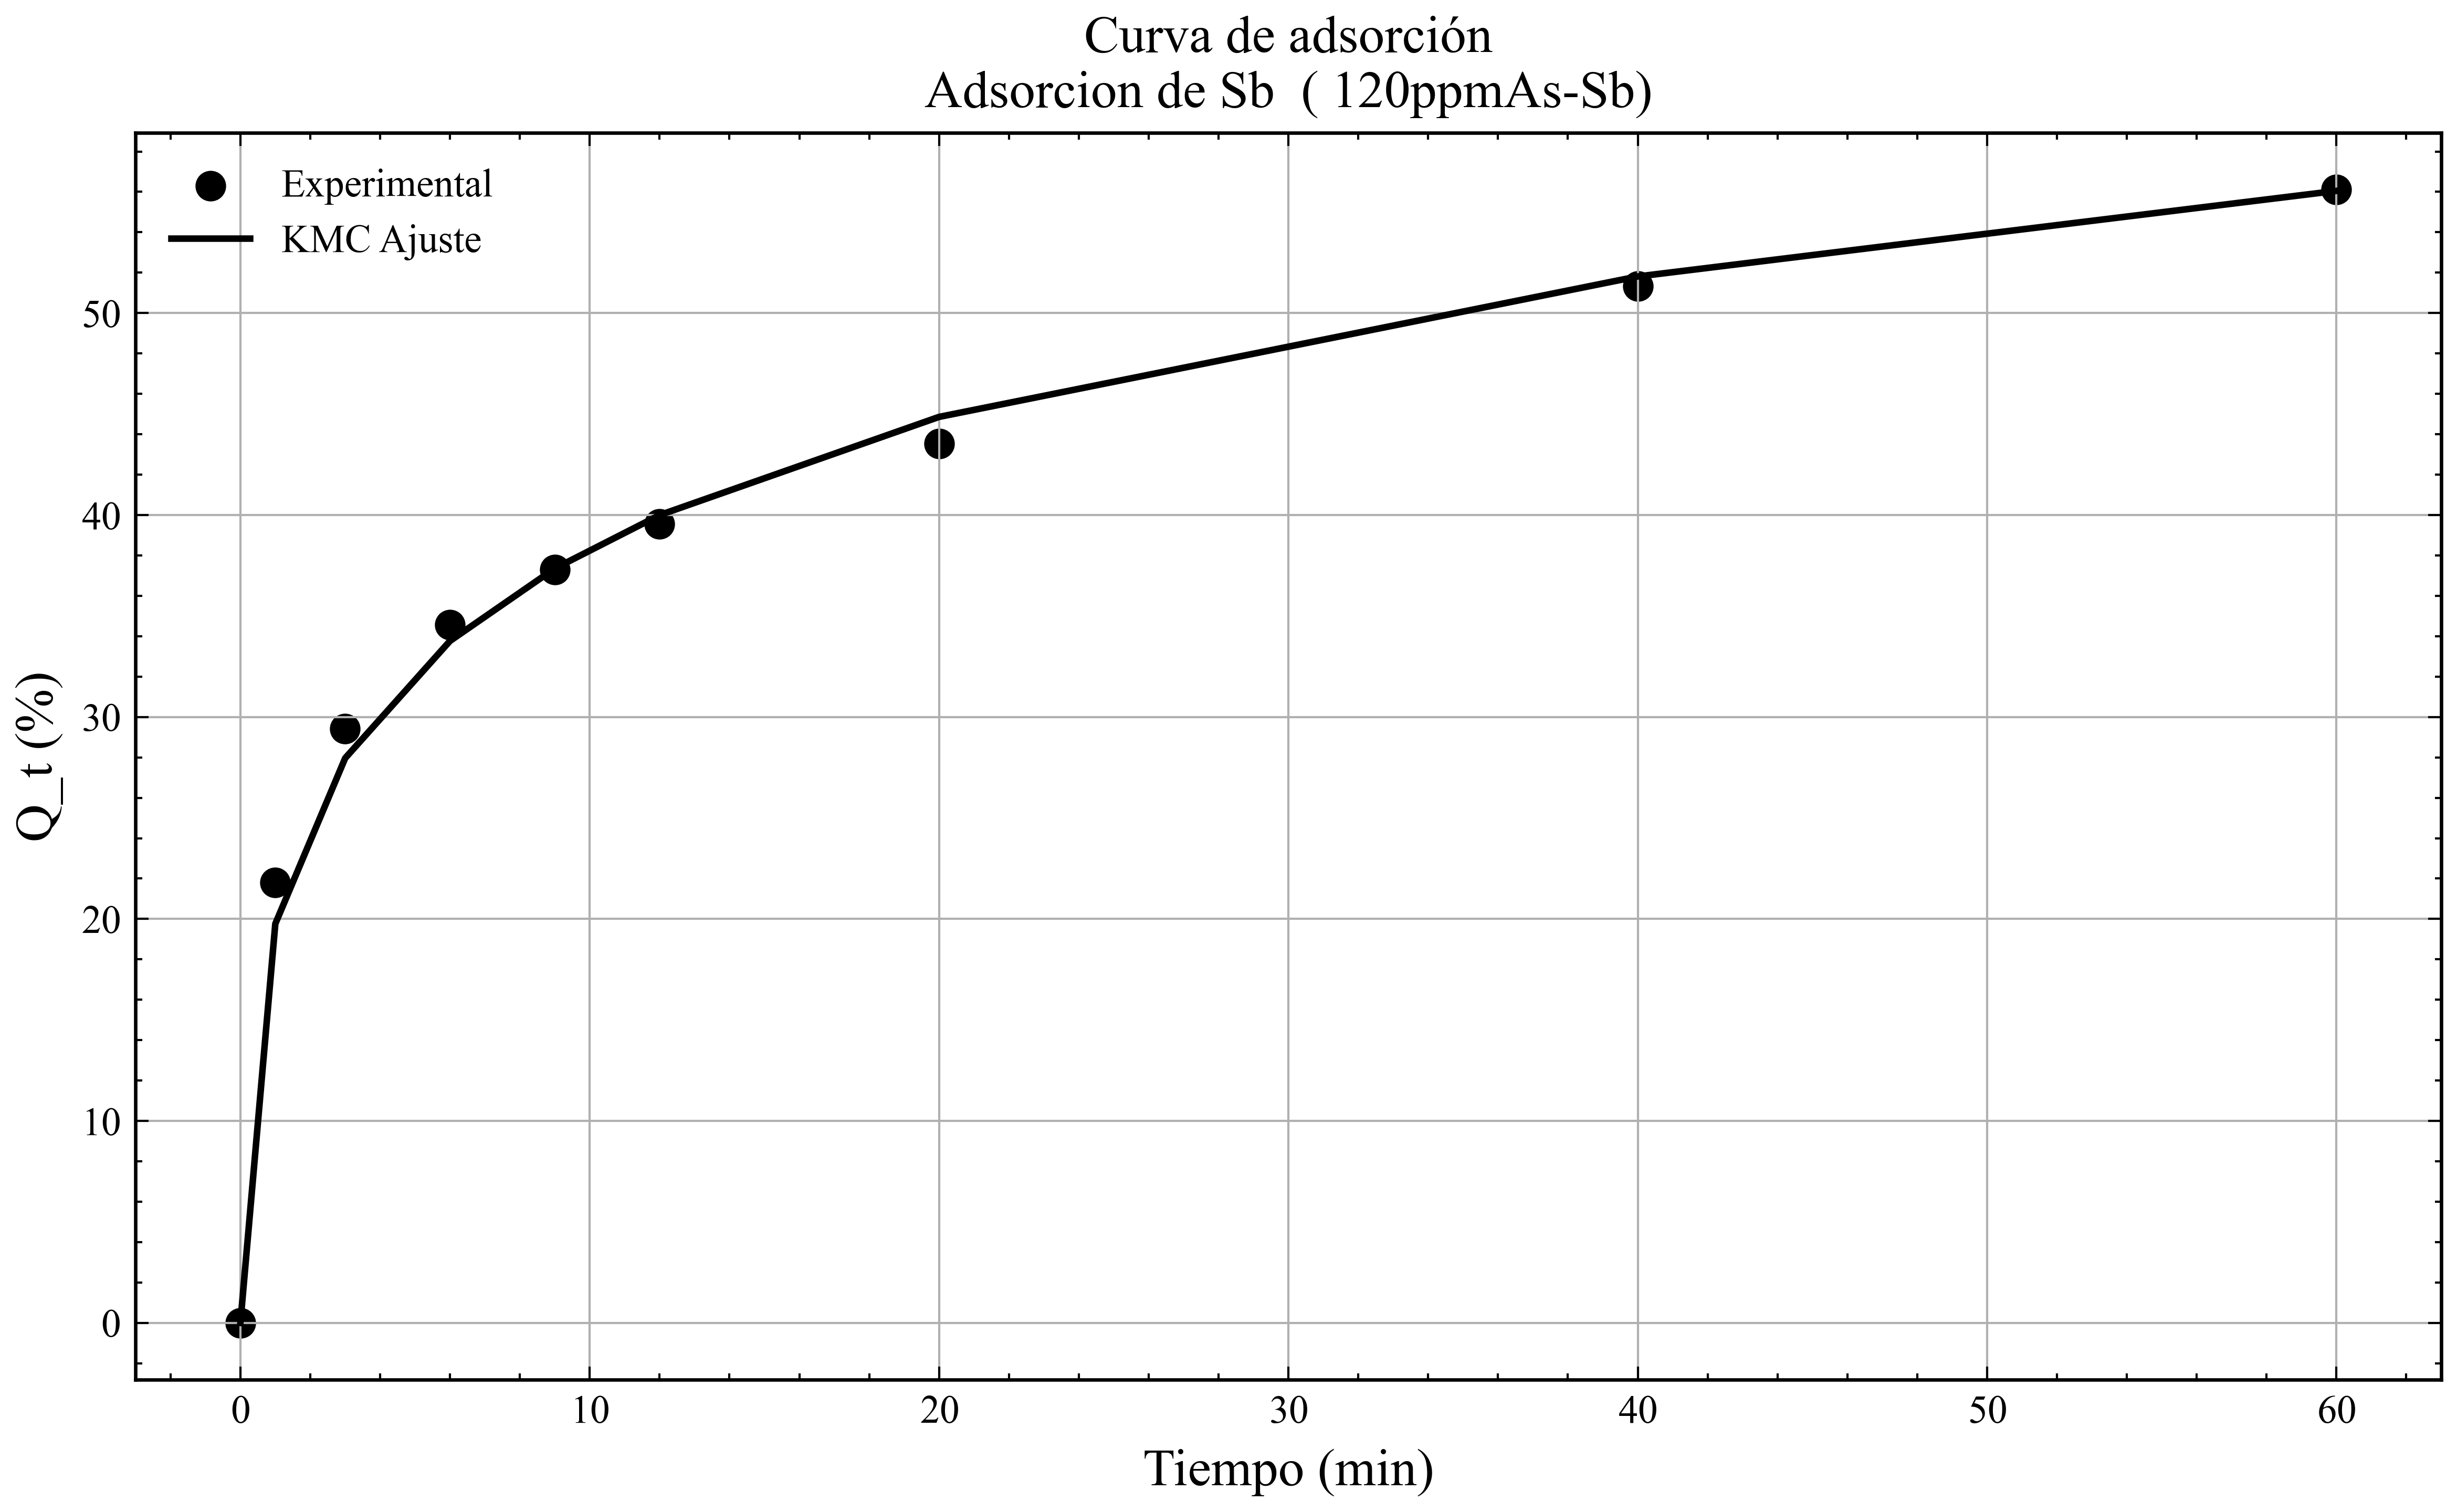

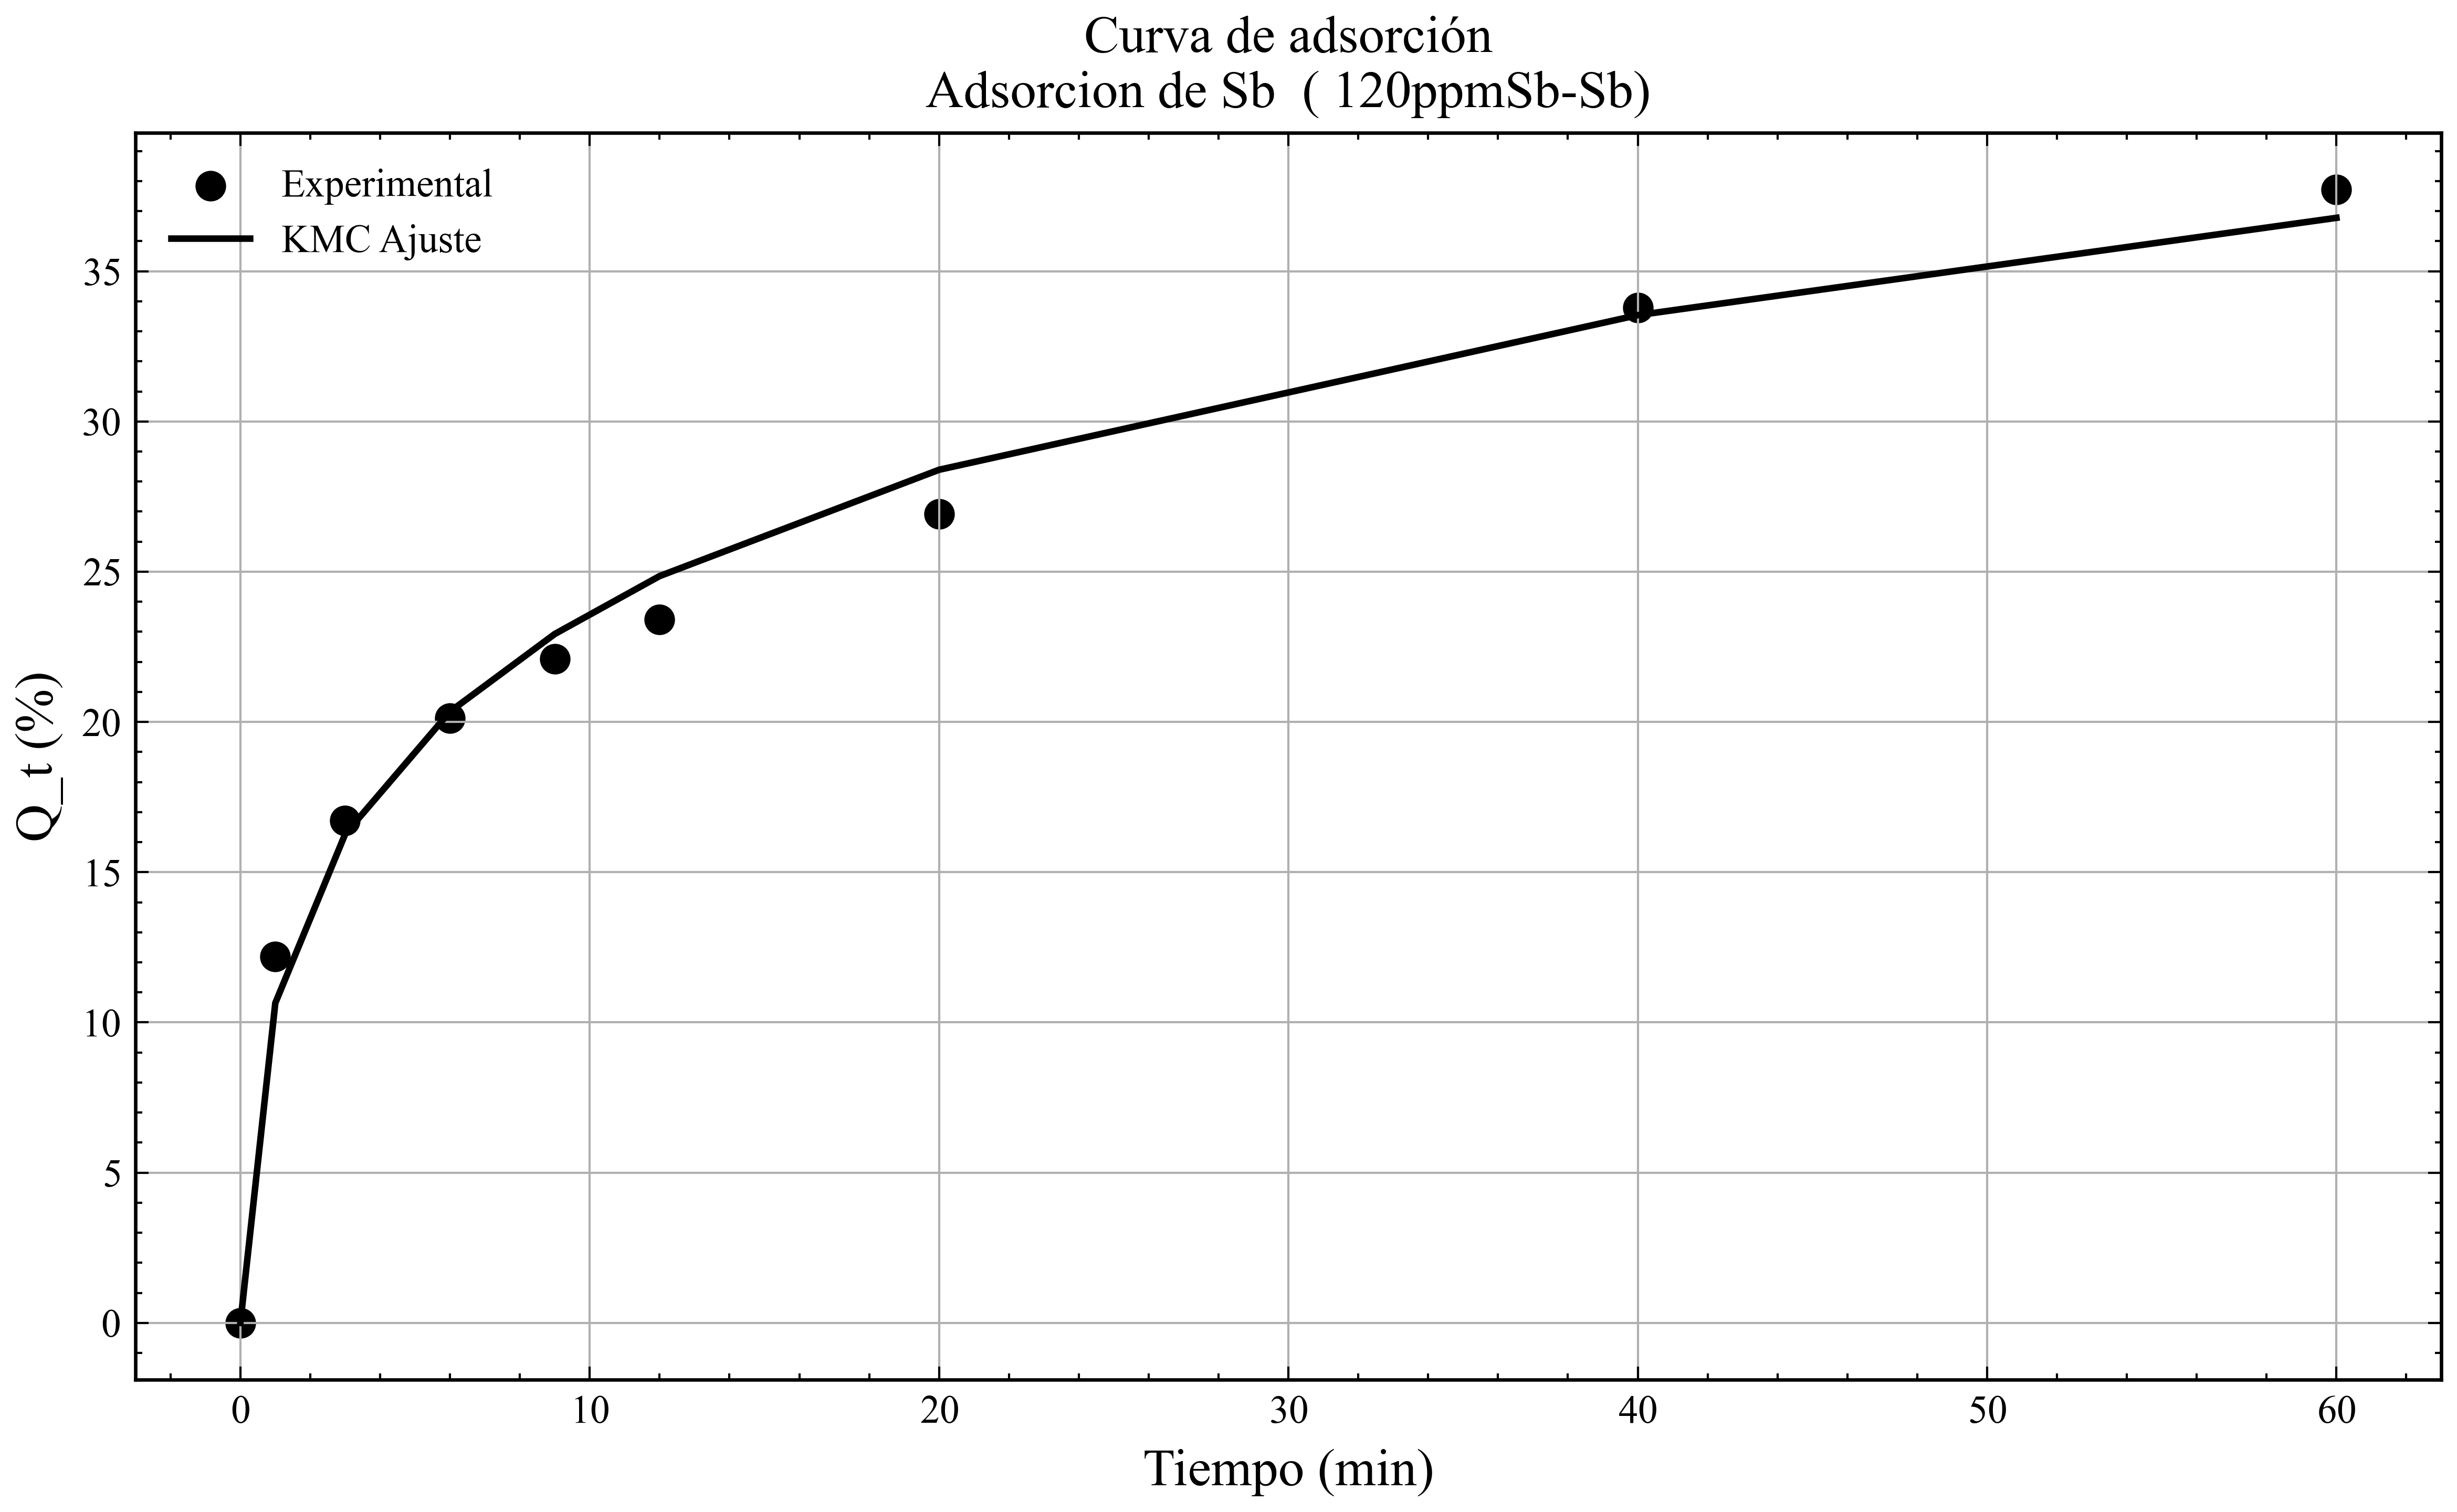

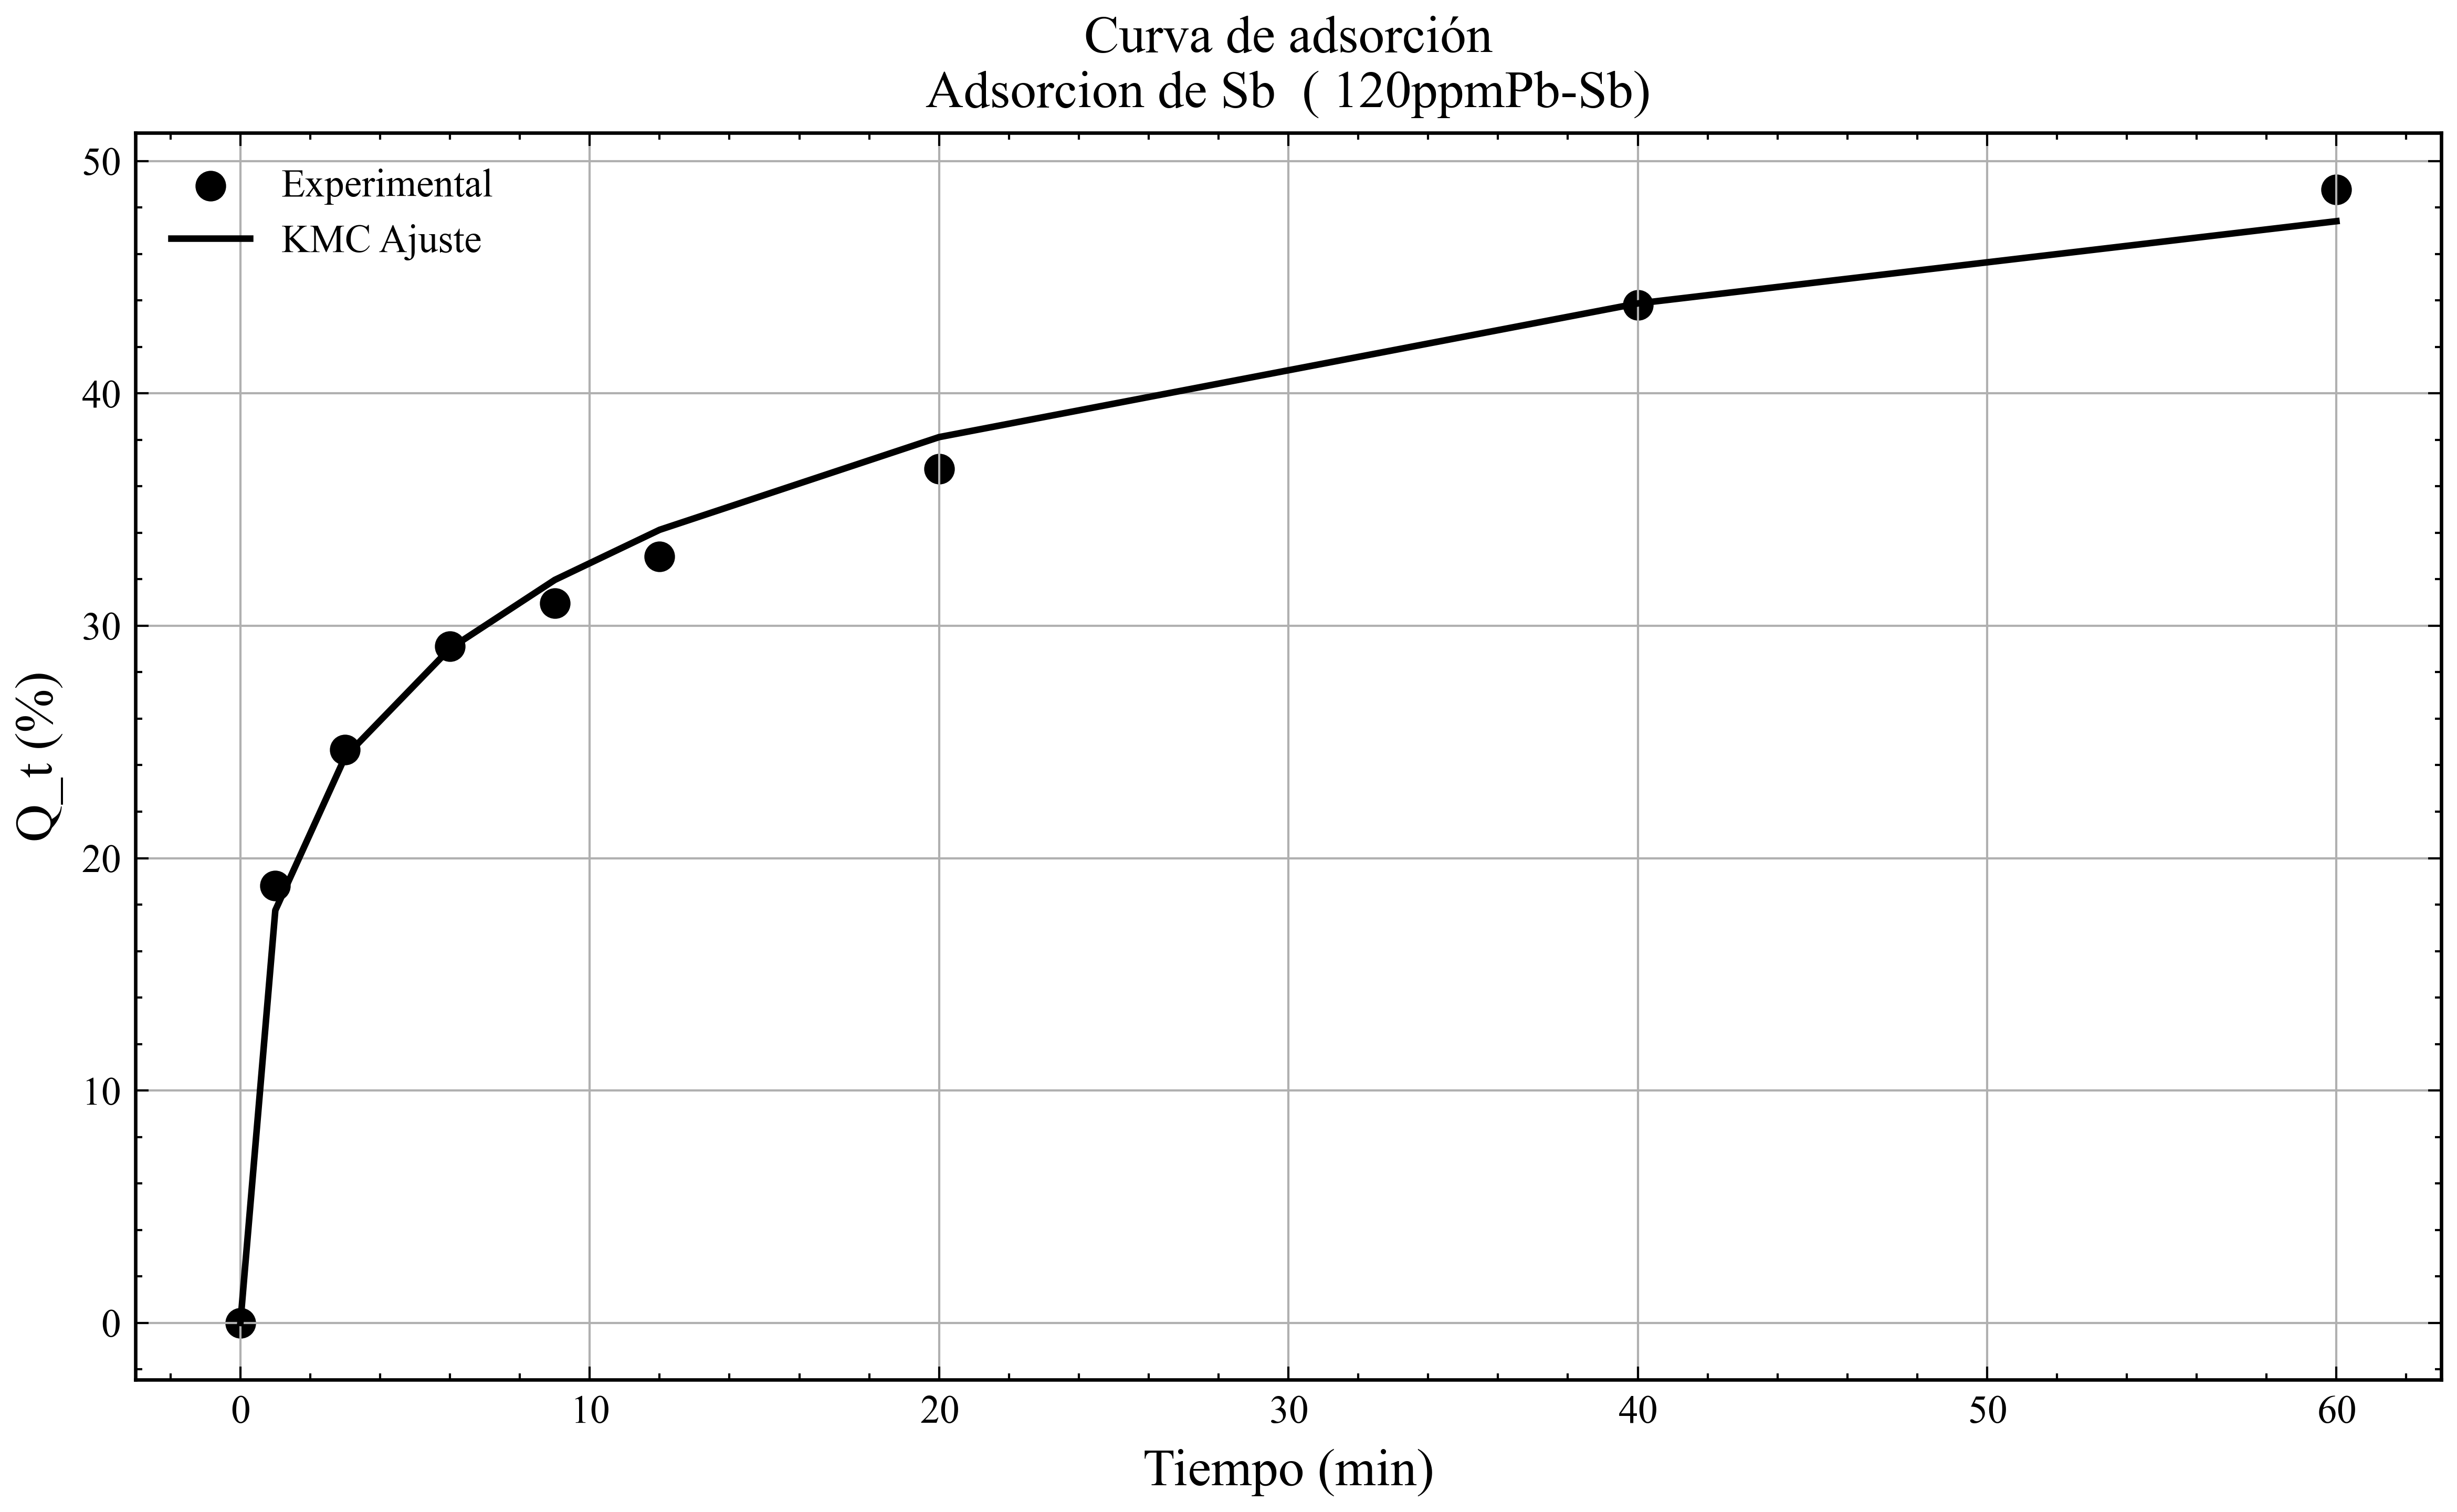

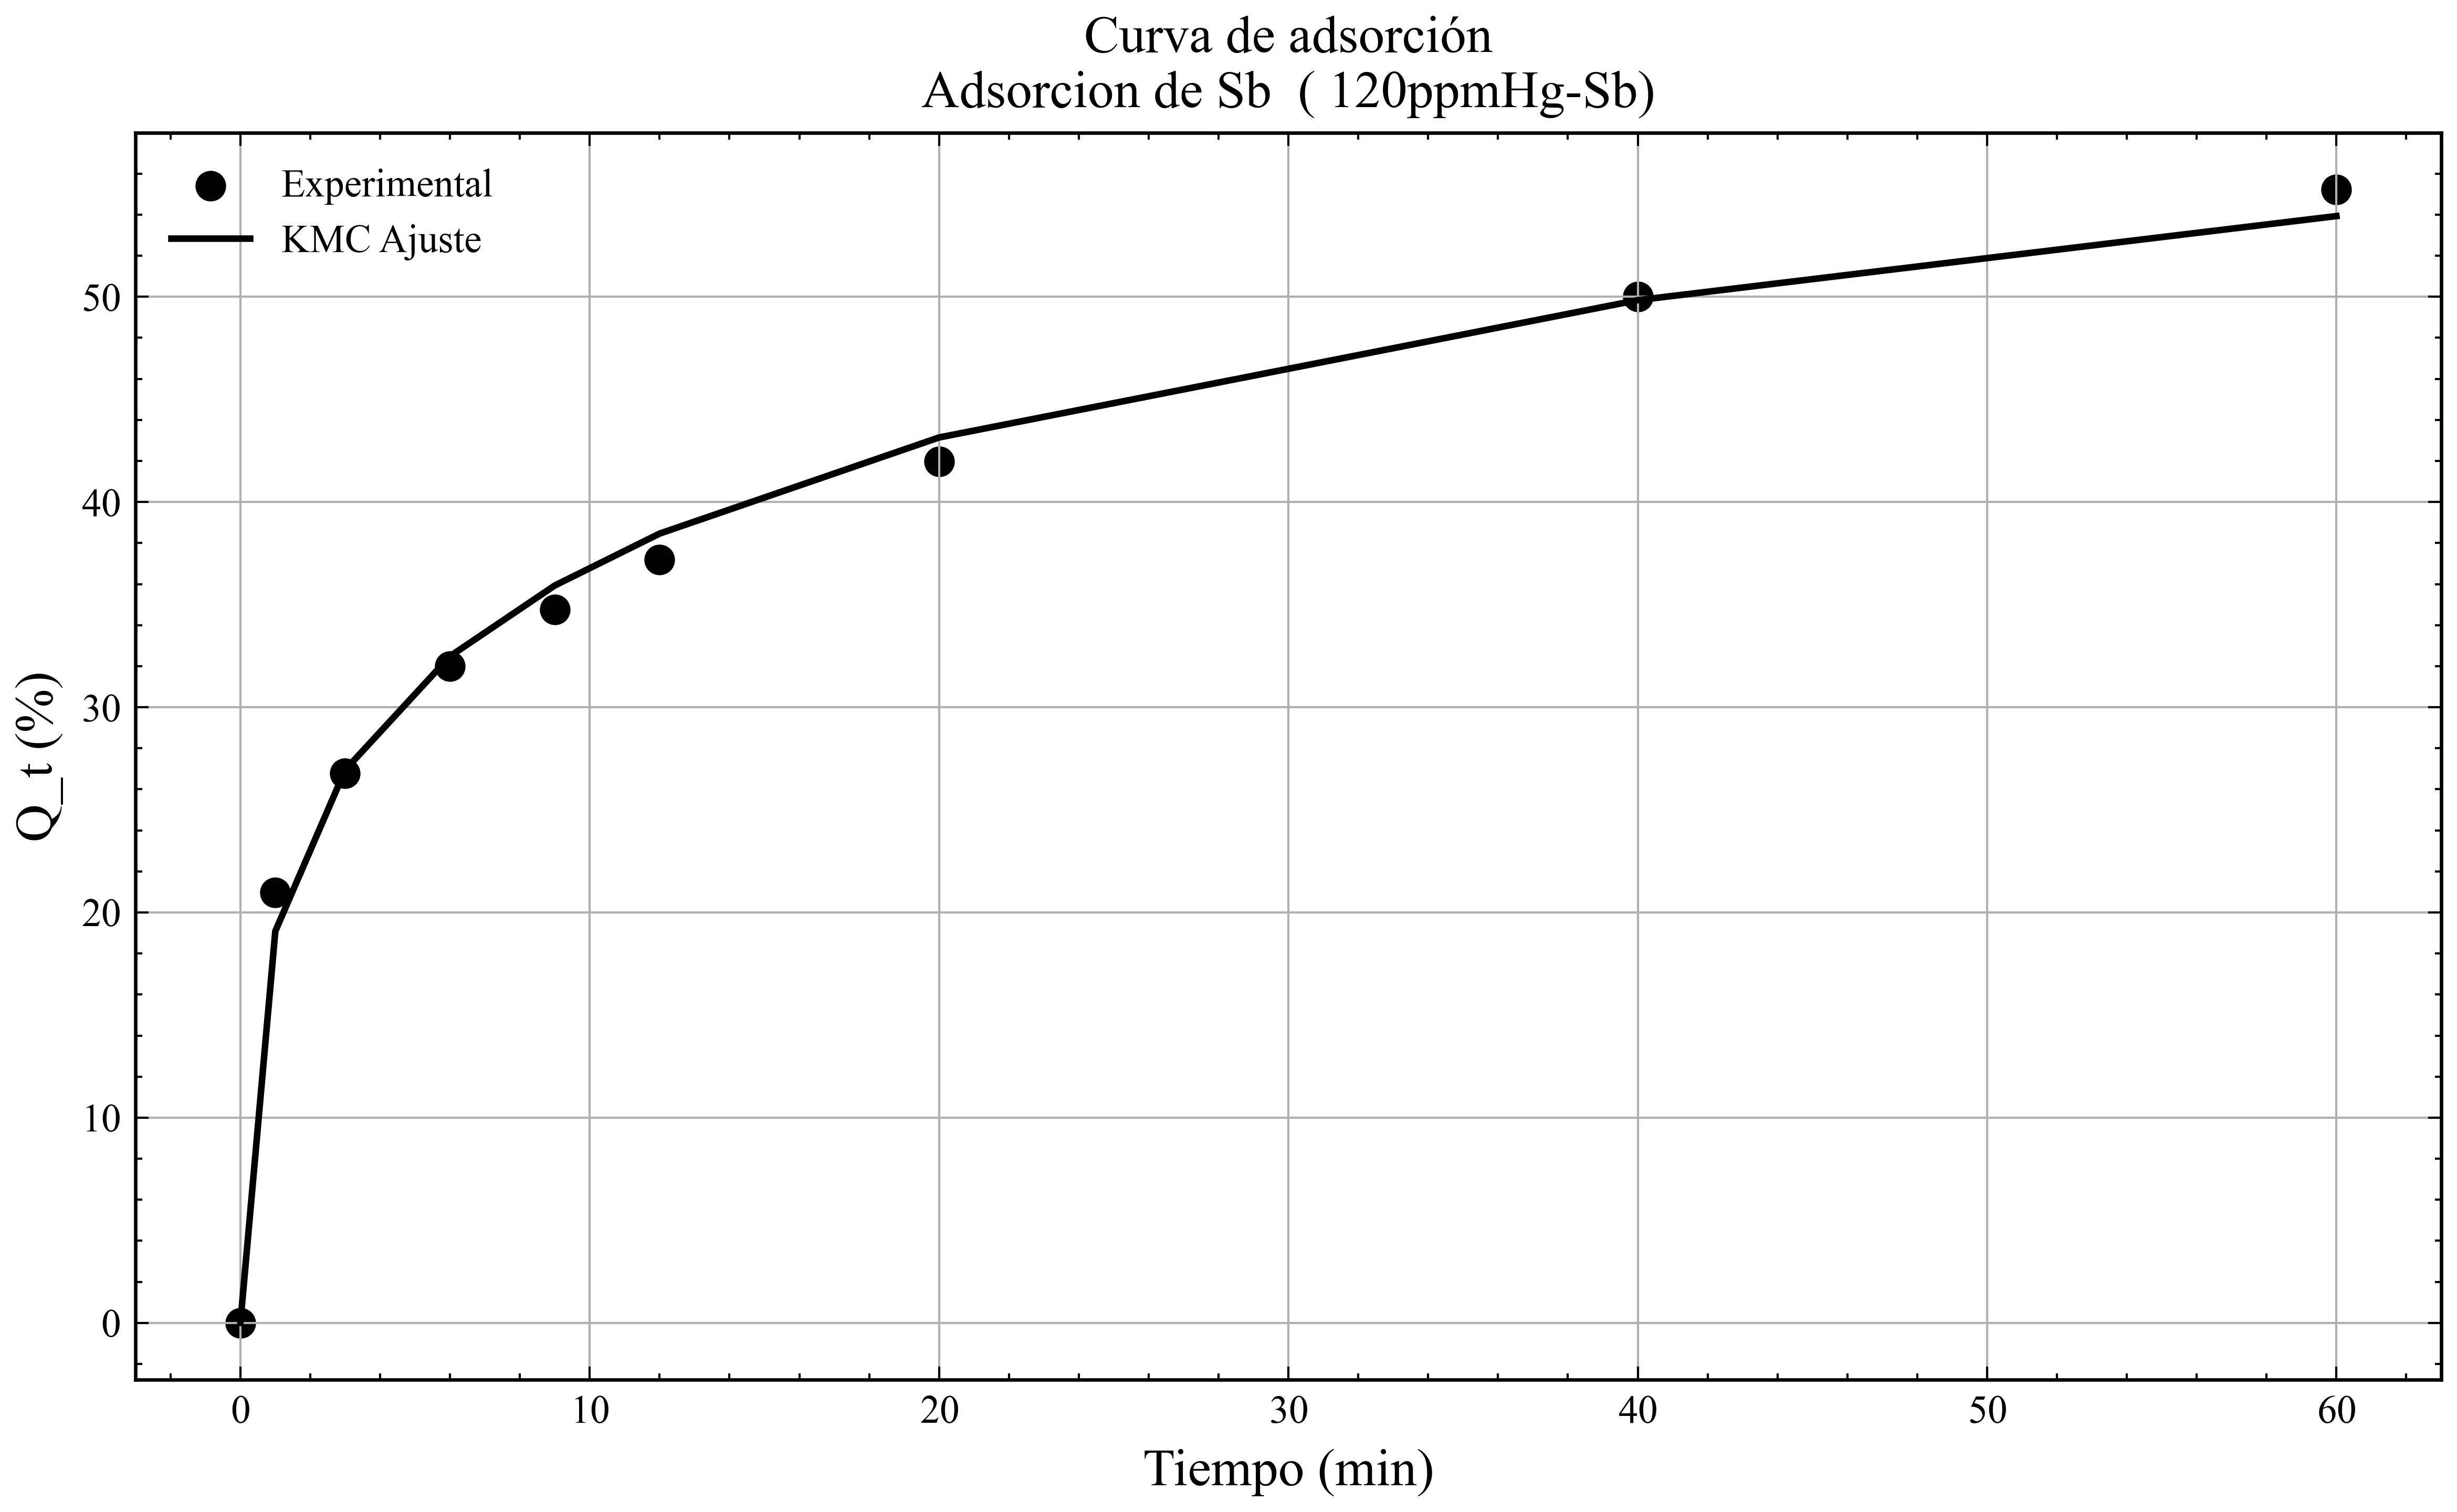

In [99]:
# Volver a graficar todas las curvas en una celda para visualización directa

for i, row in fitted_data.iterrows():
    fuente = row["Fuente(experimento)"]
    y_exp = row[exp_cols].values.astype(float)
    y_fit_mean = row[fit_mean_cols].values.astype(float)

    # Graficar
    plt.figure(figsize=(8, 5))
    plt.scatter(time_points, y_exp, label="Experimental", marker='o')
    plt.plot(time_points, y_fit_mean, label="KMC Ajuste")
    plt.title(f"Curva de adsorción\n{fuente}")
    plt.xlabel("Tiempo (min)")
    plt.ylabel("Q_t (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
